In [3]:
import tensorflow as tf 
from sklearn.decomposition import PCA
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from datetime import datetime
import time 
import os 
from PIL import Image
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Activation
from keras import Sequential
from keras.models import load_model
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

In [4]:
from platform import python_version

print(python_version())

3.10.9


In [5]:
fontdir = 'fonts'
dfs = []


for csvfile in os.listdir(fontdir):
    filepath = os.path.join(fontdir, csvfile)
    # print(filepath)

    df = pd.read_csv(filepath)
    pixel_ind = df.columns.str.startswith('r')
    pixel_ind[0] = True

    df = df.loc[:,pixel_ind]
    # print(csvfile, df.isna().all().all())

    dfs.append(df)

dfs = pd.concat(dfs).reset_index(drop=True)

In [6]:
dfs['font'].value_counts()

CASTELLAR      1056
CALIFORNIAN    1004
FRENCH          984
RAGE            976
ENGLISH         968
BRUSH           956
GLOUCESTER      956
MATURA          956
Name: font, dtype: int64

In [7]:
# reshape the 400 pixel to a 20 x 20
x = dfs.loc[:,dfs.columns.str.startswith('r')].values
print(x.shape)
x = x.reshape(-1, 20, 20)
print(x.shape)

(7856, 400)
(7856, 20, 20)


In [8]:
# function to flip image 
def rotation(img_mat):
    return np.fliplr(img_mat)

In [9]:
# create empty array to store the images
x_rotated = np.zeros((7856*2, 20, 20))

In [10]:
# flip each array once and store in new array
for i in range(x.shape[0]):
    x_rotated[2*i] = x[i]
    x_rotated[(2*i)+1] = rotation(x[i])
x_rotated.shape

(15712, 20, 20)

In [11]:
# create duplicate labels for the new dataset
dfs_rotated = dfs.font.repeat(2).reset_index(drop=True)
# reset the index after duplicate
dfs_rotated.shape

(15712,)

In [12]:
dfy = pd.get_dummies(dfs_rotated)
# one hot encoding 
class_names = dfy.columns
# names of the classes. they are columns in the one hot encoding 
y = dfy.values
# the array of one hot encoded classes
class_names, y.shape

(Index(['BRUSH', 'CALIFORNIAN', 'CASTELLAR', 'ENGLISH', 'FRENCH', 'GLOUCESTER',
        'MATURA', 'RAGE'],
       dtype='object'),
 (15712, 8))

In [13]:
dfs_rotated.value_counts()

CASTELLAR      2112
CALIFORNIAN    2008
FRENCH         1968
RAGE           1952
ENGLISH        1936
BRUSH          1912
GLOUCESTER     1912
MATURA         1912
Name: font, dtype: int64

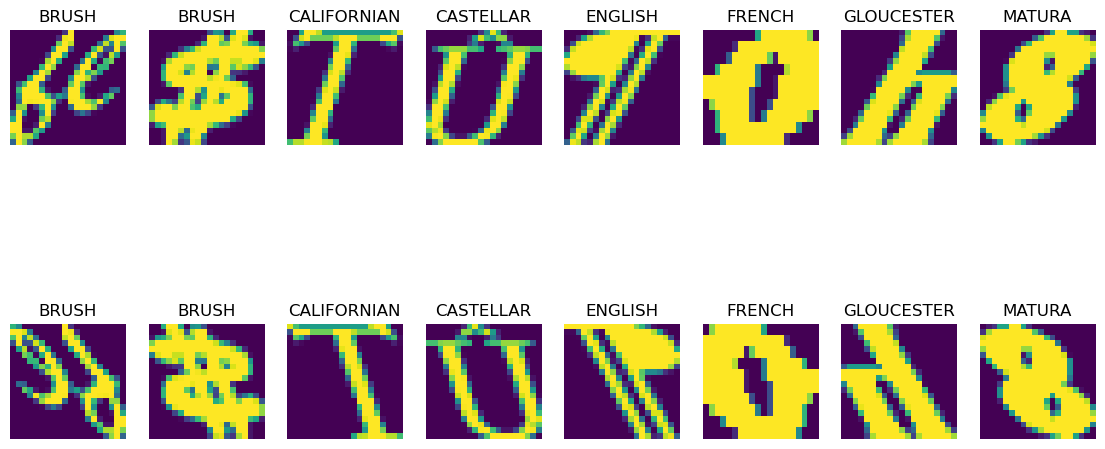

In [14]:
# create figure
fig = plt.figure(figsize=(14, 7))
rows = 2
columns = 8
# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
plt.imshow(x_rotated[0])
plt.axis('off')
plt.title(pd.Index(dfy.columns[dfy.iloc[0]==1])[0])
fig.add_subplot(rows, columns, 9)
plt.imshow(x_rotated[1])
plt.axis('off')
plt.title(pd.Index(dfy.columns[dfy.iloc[1]==1])[0])

fig.add_subplot(rows, columns, 2)
plt.imshow(x_rotated[1904])
plt.axis('off')
plt.title(pd.Index(dfy.columns[dfy.iloc[1904]==1])[0])
fig.add_subplot(rows, columns, 10)
plt.imshow(x_rotated[1905])
plt.axis('off')
plt.title(pd.Index(dfy.columns[dfy.iloc[1905]==1])[0])

fig.add_subplot(rows, columns, 3)
plt.imshow(x_rotated[3816])
plt.axis('off')
plt.title(pd.Index(dfy.columns[dfy.iloc[3816]==1])[0])
fig.add_subplot(rows, columns, 11)
plt.imshow(x_rotated[3817])
plt.axis('off')
plt.title(pd.Index(dfy.columns[dfy.iloc[3817]==1])[0])

fig.add_subplot(rows, columns, 4)
plt.imshow(x_rotated[5728])
plt.axis('off')
plt.title(pd.Index(dfy.columns[dfy.iloc[5728]==1])[0])
fig.add_subplot(rows, columns, 12)
plt.imshow(x_rotated[5729])
plt.axis('off')
plt.title(pd.Index(dfy.columns[dfy.iloc[5729]==1])[0])

fig.add_subplot(rows, columns, 5)
plt.imshow(x_rotated[7736])
plt.axis('off')
plt.title(pd.Index(dfy.columns[dfy.iloc[7736]==1])[0])
fig.add_subplot(rows, columns, 13)
plt.imshow(x_rotated[7737])
plt.axis('off')
plt.title(pd.Index(dfy.columns[dfy.iloc[7737]==1])[0])

fig.add_subplot(rows, columns, 6)
plt.imshow(x_rotated[9696])
plt.axis('off')
plt.title(pd.Index(dfy.columns[dfy.iloc[9696]==1])[0])
fig.add_subplot(rows, columns, 14)
plt.imshow(x_rotated[9697])
plt.axis('off')
plt.title(pd.Index(dfy.columns[dfy.iloc[9697]==1])[0])

fig.add_subplot(rows, columns, 7)
plt.imshow(x_rotated[11704])
plt.axis('off')
plt.title(pd.Index(dfy.columns[dfy.iloc[11704]==1])[0])
fig.add_subplot(rows, columns, 15)
plt.imshow(x_rotated[11705])
plt.axis('off')
plt.title(pd.Index(dfy.columns[dfy.iloc[11705]==1])[0])

fig.add_subplot(rows, columns, 8)
plt.imshow(x_rotated[13712])
plt.axis('off')
plt.title(pd.Index(dfy.columns[dfy.iloc[13712]==1])[0])
fig.add_subplot(rows, columns, 16)
plt.imshow(x_rotated[13713])
plt.axis('off')
plt.title(pd.Index(dfy.columns[dfy.iloc[13713]==1])[0])

plt.show()

In [15]:
x_input = x_rotated[..., np.newaxis]/255
x_input.shape, y.shape

((15712, 20, 20, 1), (15712, 8))

In [16]:
x_trainval, x_test, y_trainval, y_test = train_test_split(x_input, y, test_size=.1, random_state=3)

x_trainval.shape, x_test.shape, y_trainval.shape, y_test.shape

((14140, 20, 20, 1), (1572, 20, 20, 1), (14140, 8), (1572, 8))

In [17]:
# Create callback class 
class MyCallBack(tf.keras.callbacks.Callback):
    def __init__(self,model_name):
        super().__init__()
        self.model_name = model_name
        self.history = {
            'train_loss': [],
            'train_accuracy': [],
            'val_loss': [],
            'val_accuracy': [],
        }
        self.epoch_times = []
    def on_epoch_begin(self, epoch, logs=None):
        self.epoch_start_time = time.time()

    # on epoch calculation
    def on_epoch_end(self, epoch, logs={}):
        # save the model weights
        save_path = f'C:/Final_Weights/{self.model.model_name}/epoch_{epoch + 1}'
        os.makedirs(save_path, exist_ok=True)
        self.model.save_weights(os.path.join(save_path, "model_weights.h5"))

        # append the train and validation loss and accuracy to history
        self.history['train_loss'].append(logs.get('loss'))
        self.history['train_accuracy'].append(logs.get('accuracy'))
        self.history['val_loss'].append(logs.get('val_loss'))
        self.history['val_accuracy'].append(logs.get('val_accuracy'))
        
        epoch_end_time = time.time()
        self.epoch_times.append(epoch_end_time - self.epoch_start_time)
        return super().on_epoch_end(epoch, logs)


In [18]:
# Define CNN + MLP
class MyModel(tf.keras.Model):
  def __init__(self, chan1,ker1,chan2,ker2,hidden,dropout, model_name, kernel_initializer,outer_layer_size=8):
    super(MyModel, self).__init__()
    #self.i = tf.keras.layers.Input(shape=(20,20))
    self.c1 = tf.keras.layers.Conv2D(chan1, ker1, activation='relu',kernel_initializer=kernel_initializer)
    self.m1 = tf.keras.layers.MaxPooling2D((2,2))
    self.c2 = tf.keras.layers.Conv2D(chan2, ker2, activation='relu',kernel_initializer=kernel_initializer)
    self.m2 = tf.keras.layers.MaxPooling2D((2,2))
    self.f1 = tf.keras.layers.Flatten()
    self.h1 = tf.keras.layers.Dense(hidden, activation='relu',kernel_initializer=kernel_initializer)
    self.d1 = tf.keras.layers.Dropout(dropout)
    self.o = tf.keras.layers.Dense(outer_layer_size, activation='softmax')
    self.model_name = model_name

  def call(self,x):
    self.l2 = self.c1(x)
    self.l3 = self.m1(self.l2)
    self.l4 = self.c2(self.l3)
    self.l5 = self.m2(self.l4)
    self.l6 = self.f1(self.l5)
    self.l7 = self.h1(self.l6)
    self.l8 = self.d1(self.l7)
    self.y = self.o(self.l8)
    return self.y 

In [19]:
def hid_lay_size(input_size,f1,m1,f2,m2,channels):
    c1 = ((input_size - f1) + (2*0)/1) + 1
    m1 = np.math.floor(((c1 - 2)/2) + 1)
    c2 = ((m1 - f2) + (2*0)/1) + 1
    m2 = np.math.floor(((c2 - 2)/2) + 1)
    hid_lay = (m2 * m2 * channels)/2
    return hid_lay
     

In [20]:
hid_lay_size(20,f1=3,m1=2,f2=2,m2=2,channels=32)

256.0

In [44]:
def calculate_image_size(channels1, kernel_size1, channels2, kernel_size2, input_size):
    # apply first convolutional layer
    conv1_size = (input_size - kernel_size1) + 1
    pool1_size = ((conv1_size - 2) // 2) + 1

    # apply second convolutional layer
    conv2_size = pool1_size - kernel_size2 + 1
    pool2_size = ((conv2_size - 2) // 2) + 1

    # calculate the final flattened output size
    output_size = pool2_size * pool2_size * channels2

    return (conv1_size,conv1_size,channels1),(pool1_size,pool1_size,channels1),(conv2_size,conv2_size,channels2),(pool2_size,pool2_size,channels2), output_size, output_size/2

In [57]:
calculate_image_size(channels1=16, kernel_size1=5, channels2=16, kernel_size2=3, input_size=20)

((16, 16, 16), (8, 8, 16), (6, 6, 16), (3, 3, 16), 144, 72.0)

In [58]:
def model_builder(chan1,ker1,chan2,ker2,hidden,dropout,kernel_initializer,lr,batch_size,epochs, trainx,trainy,testx,testy,model_name,outer_layer_size=8,fit=True):
    inst_model = MyModel(chan1=chan1,ker1=ker1,chan2=chan2,ker2=ker2,hidden=hidden,kernel_initializer=kernel_initializer,dropout=dropout, model_name=model_name,outer_layer_size=outer_layer_size)
    inst_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
            loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])
    early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',min_delta=0.01 ,patience=10, verbose=1, start_from_epoch=150)
    call_back = MyCallBack(model_name = inst_model)
    if (fit ==True):
        inst_hist = inst_model.fit(
            trainx,
            trainy,
            validation_data=(testx, testy),
            batch_size=batch_size,
            epochs=epochs,
            verbose='auto',
            #verbose=0,
            callbacks=[call_back,early_stop])
    else:
        inst_hist = None 
    inst_model.summary()
    return inst_model,inst_hist,call_back

In [59]:
model_dict = {'model_8_3_16_2':None,
              'model_8_3_16_3':None,
              'model_8_3_8_3':None,
              'model_8_3_8_2':None,
              'model_8_5_24_2':None,
              'model_8_5_24_3':None,
              'model_16_5_32_2':None,
              'model_16_5_32_3':None,
              'model_24_5_48_2':None,
              'model_24_5_48_3':None,
              'model_16_3_16_2':None,
              'model_16_3_16_3':None}

for c1 in [8,16,24]:
    for k1 in [3,5]:
        for c2 in [8,16,24,32,48]:
            for k2 in [2,3]:
                model_name = f'model_{c1}_{k1}_{c2}_{k2}' 
                if model_name in model_dict:
                  model = model_builder(chan1=c1,ker1=k1,chan2=c2,ker2=k2,
                                        hidden=calculate_image_size(channels1=c1, kernel_size1=k1, 
                                                                    channels2=c2, kernel_size2=k2, 
                                                                    input_size=20)[5],
                                        kernel_initializer='glorot_uniform',
                                        dropout=0.2, lr=0.003,
                                        batch_size=100,
                                        epochs=150,
                                        model_name=model_name,
                                        outer_layer_size=8,
                                        trainx=x_trainval,trainy=y_trainval,testx=x_test,testy=y_test,
                                        fit=True)
                  model_dict[model_name] = model
      

Epoch 1/150
142/142 [==============================] - 9s 15ms/step - loss: 1.9186 - accuracy: 0.2455 - val_loss: 1.7589 - val_accuracy: 0.3467
Epoch 2/150
142/142 [==============================] - 1s 5ms/step - loss: 1.7072 - accuracy: 0.3617 - val_loss: 1.6310 - val_accuracy: 0.4078
Epoch 3/150
142/142 [==============================] - 1s 6ms/step - loss: 1.6006 - accuracy: 0.4084 - val_loss: 1.5453 - val_accuracy: 0.4485
Epoch 4/150
142/142 [==============================] - 1s 5ms/step - loss: 1.5098 - accuracy: 0.4518 - val_loss: 1.4828 - val_accuracy: 0.4606
Epoch 5/150
142/142 [==============================] - 1s 5ms/step - loss: 1.4437 - accuracy: 0.4784 - val_loss: 1.4076 - val_accuracy: 0.4962
Epoch 6/150
142/142 [==============================] - 1s 5ms/step - loss: 1.3907 - accuracy: 0.4977 - val_loss: 1.4061 - val_accuracy: 0.4962
Epoch 7/150
142/142 [==============================] - 1s 5ms/step - loss: 1.3345 - accuracy: 0.5202 - val_loss: 1.3303 - val_accuracy: 0.525

Epoch 58/150
142/142 [==============================] - 1s 5ms/step - loss: 0.8672 - accuracy: 0.6751 - val_loss: 1.0953 - val_accuracy: 0.6190
Epoch 59/150
142/142 [==============================] - 1s 5ms/step - loss: 0.8506 - accuracy: 0.6825 - val_loss: 1.1203 - val_accuracy: 0.6177
Epoch 60/150
142/142 [==============================] - 1s 5ms/step - loss: 0.8378 - accuracy: 0.6843 - val_loss: 1.0996 - val_accuracy: 0.6132
Epoch 61/150
142/142 [==============================] - 1s 5ms/step - loss: 0.8444 - accuracy: 0.6834 - val_loss: 1.1728 - val_accuracy: 0.6177
Epoch 62/150
142/142 [==============================] - 1s 5ms/step - loss: 0.8598 - accuracy: 0.6748 - val_loss: 1.1019 - val_accuracy: 0.6164
Epoch 63/150
142/142 [==============================] - 1s 5ms/step - loss: 0.8446 - accuracy: 0.6810 - val_loss: 1.1345 - val_accuracy: 0.6075
Epoch 64/150
142/142 [==============================] - 1s 5ms/step - loss: 0.8349 - accuracy: 0.6822 - val_loss: 1.1347 - val_accuracy:

Epoch 115/150
142/142 [==============================] - 1s 5ms/step - loss: 0.7775 - accuracy: 0.7055 - val_loss: 1.1569 - val_accuracy: 0.6298
Epoch 116/150
142/142 [==============================] - 1s 5ms/step - loss: 0.7669 - accuracy: 0.7064 - val_loss: 1.1795 - val_accuracy: 0.6336
Epoch 117/150
142/142 [==============================] - 1s 5ms/step - loss: 0.7620 - accuracy: 0.7097 - val_loss: 1.1940 - val_accuracy: 0.6190
Epoch 118/150
142/142 [==============================] - 1s 5ms/step - loss: 0.7639 - accuracy: 0.7055 - val_loss: 1.1714 - val_accuracy: 0.6272
Epoch 119/150
142/142 [==============================] - 1s 5ms/step - loss: 0.7773 - accuracy: 0.7024 - val_loss: 1.1673 - val_accuracy: 0.6190
Epoch 120/150
142/142 [==============================] - 1s 5ms/step - loss: 0.7683 - accuracy: 0.7063 - val_loss: 1.1815 - val_accuracy: 0.6151
Epoch 121/150
142/142 [==============================] - 1s 5ms/step - loss: 0.7766 - accuracy: 0.7054 - val_loss: 1.1861 - val_ac

142/142 [==============================] - 1s 7ms/step - loss: 1.5055 - accuracy: 0.4332 - val_loss: 1.5109 - val_accuracy: 0.4326
Epoch 11/150
142/142 [==============================] - 1s 5ms/step - loss: 1.4934 - accuracy: 0.4394 - val_loss: 1.4939 - val_accuracy: 0.4459
Epoch 12/150
142/142 [==============================] - 1s 5ms/step - loss: 1.4835 - accuracy: 0.4382 - val_loss: 1.4796 - val_accuracy: 0.4434
Epoch 13/150
142/142 [==============================] - 1s 6ms/step - loss: 1.4676 - accuracy: 0.4459 - val_loss: 1.4803 - val_accuracy: 0.4478
Epoch 14/150
142/142 [==============================] - 1s 6ms/step - loss: 1.4552 - accuracy: 0.4503 - val_loss: 1.4766 - val_accuracy: 0.4504
Epoch 15/150
142/142 [==============================] - 1s 6ms/step - loss: 1.4466 - accuracy: 0.4541 - val_loss: 1.4538 - val_accuracy: 0.4618
Epoch 16/150
142/142 [==============================] - 1s 5ms/step - loss: 1.4409 - accuracy: 0.4549 - val_loss: 1.4689 - val_accuracy: 0.4472
Epoch

Epoch 67/150
142/142 [==============================] - 1s 5ms/step - loss: 1.2682 - accuracy: 0.5062 - val_loss: 1.4307 - val_accuracy: 0.4994
Epoch 68/150
142/142 [==============================] - 1s 5ms/step - loss: 1.2625 - accuracy: 0.5143 - val_loss: 1.4064 - val_accuracy: 0.4968
Epoch 69/150
142/142 [==============================] - 1s 5ms/step - loss: 1.2629 - accuracy: 0.5143 - val_loss: 1.4185 - val_accuracy: 0.4955
Epoch 70/150
142/142 [==============================] - 1s 5ms/step - loss: 1.2671 - accuracy: 0.5112 - val_loss: 1.3982 - val_accuracy: 0.4962
Epoch 71/150
142/142 [==============================] - 1s 5ms/step - loss: 1.2646 - accuracy: 0.5153 - val_loss: 1.4201 - val_accuracy: 0.4924
Epoch 72/150
142/142 [==============================] - 1s 5ms/step - loss: 1.2566 - accuracy: 0.5165 - val_loss: 1.4116 - val_accuracy: 0.5108
Epoch 73/150
142/142 [==============================] - 1s 5ms/step - loss: 1.2567 - accuracy: 0.5181 - val_loss: 1.4465 - val_accuracy:

Epoch 124/150
142/142 [==============================] - 1s 5ms/step - loss: 1.2269 - accuracy: 0.5249 - val_loss: 1.4284 - val_accuracy: 0.4924
Epoch 125/150
142/142 [==============================] - 1s 5ms/step - loss: 1.2213 - accuracy: 0.5254 - val_loss: 1.4184 - val_accuracy: 0.5064
Epoch 126/150
142/142 [==============================] - 1s 5ms/step - loss: 1.2198 - accuracy: 0.5277 - val_loss: 1.4543 - val_accuracy: 0.4822
Epoch 127/150
142/142 [==============================] - 1s 5ms/step - loss: 1.2247 - accuracy: 0.5261 - val_loss: 1.4227 - val_accuracy: 0.5057
Epoch 128/150
142/142 [==============================] - 1s 5ms/step - loss: 1.2218 - accuracy: 0.5291 - val_loss: 1.4273 - val_accuracy: 0.4949
Epoch 129/150
142/142 [==============================] - 1s 5ms/step - loss: 1.2200 - accuracy: 0.5289 - val_loss: 1.4253 - val_accuracy: 0.5025
Epoch 130/150
142/142 [==============================] - 1s 5ms/step - loss: 1.2219 - accuracy: 0.5284 - val_loss: 1.4298 - val_ac

142/142 [==============================] - 1s 5ms/step - loss: 0.6417 - accuracy: 0.7637 - val_loss: 0.9825 - val_accuracy: 0.6775
Epoch 20/150
142/142 [==============================] - 1s 5ms/step - loss: 0.6159 - accuracy: 0.7767 - val_loss: 0.9914 - val_accuracy: 0.6870
Epoch 21/150
142/142 [==============================] - 1s 5ms/step - loss: 0.6051 - accuracy: 0.7769 - val_loss: 0.9658 - val_accuracy: 0.6851
Epoch 22/150
142/142 [==============================] - 1s 5ms/step - loss: 0.5880 - accuracy: 0.7830 - val_loss: 0.9600 - val_accuracy: 0.6934
Epoch 23/150
142/142 [==============================] - 1s 5ms/step - loss: 0.5646 - accuracy: 0.7892 - val_loss: 0.9342 - val_accuracy: 0.6991
Epoch 24/150
142/142 [==============================] - 1s 5ms/step - loss: 0.5576 - accuracy: 0.7955 - val_loss: 0.9557 - val_accuracy: 0.6947
Epoch 25/150
142/142 [==============================] - 1s 5ms/step - loss: 0.5447 - accuracy: 0.7977 - val_loss: 0.9931 - val_accuracy: 0.6997
Epoch

Epoch 76/150
142/142 [==============================] - 1s 5ms/step - loss: 0.3258 - accuracy: 0.8818 - val_loss: 1.2619 - val_accuracy: 0.7163
Epoch 77/150
142/142 [==============================] - 1s 5ms/step - loss: 0.3368 - accuracy: 0.8743 - val_loss: 1.2438 - val_accuracy: 0.7309
Epoch 78/150
142/142 [==============================] - 1s 5ms/step - loss: 0.3305 - accuracy: 0.8751 - val_loss: 1.3677 - val_accuracy: 0.7176
Epoch 79/150
142/142 [==============================] - 1s 5ms/step - loss: 0.3358 - accuracy: 0.8731 - val_loss: 1.2314 - val_accuracy: 0.7214
Epoch 80/150
142/142 [==============================] - 1s 5ms/step - loss: 0.3230 - accuracy: 0.8782 - val_loss: 1.2280 - val_accuracy: 0.7385
Epoch 81/150
142/142 [==============================] - 1s 5ms/step - loss: 0.3147 - accuracy: 0.8811 - val_loss: 1.2936 - val_accuracy: 0.7379
Epoch 82/150
142/142 [==============================] - 1s 5ms/step - loss: 0.3078 - accuracy: 0.8825 - val_loss: 1.3563 - val_accuracy:

142/142 [==============================] - 1s 5ms/step - loss: 0.2687 - accuracy: 0.8997 - val_loss: 1.6104 - val_accuracy: 0.7322
Epoch 133/150
142/142 [==============================] - 1s 5ms/step - loss: 0.2617 - accuracy: 0.8980 - val_loss: 1.6207 - val_accuracy: 0.7341
Epoch 134/150
142/142 [==============================] - 1s 5ms/step - loss: 0.2579 - accuracy: 0.9021 - val_loss: 1.6553 - val_accuracy: 0.7309
Epoch 135/150
142/142 [==============================] - 1s 5ms/step - loss: 0.2673 - accuracy: 0.9009 - val_loss: 1.5764 - val_accuracy: 0.7316
Epoch 136/150
142/142 [==============================] - 1s 5ms/step - loss: 0.2690 - accuracy: 0.8993 - val_loss: 1.5773 - val_accuracy: 0.7328
Epoch 137/150
142/142 [==============================] - 1s 5ms/step - loss: 0.2611 - accuracy: 0.9017 - val_loss: 1.6577 - val_accuracy: 0.7284
Epoch 138/150
142/142 [==============================] - 1s 5ms/step - loss: 0.2732 - accuracy: 0.8981 - val_loss: 1.5116 - val_accuracy: 0.7354

Epoch 28/150
142/142 [==============================] - 1s 5ms/step - loss: 0.9368 - accuracy: 0.6527 - val_loss: 1.1958 - val_accuracy: 0.5897
Epoch 29/150
142/142 [==============================] - 1s 5ms/step - loss: 0.9286 - accuracy: 0.6540 - val_loss: 1.1954 - val_accuracy: 0.5852
Epoch 30/150
142/142 [==============================] - 1s 5ms/step - loss: 0.9231 - accuracy: 0.6516 - val_loss: 1.1747 - val_accuracy: 0.5821
Epoch 31/150
142/142 [==============================] - 1s 5ms/step - loss: 0.9155 - accuracy: 0.6544 - val_loss: 1.1981 - val_accuracy: 0.5859
Epoch 32/150
142/142 [==============================] - 1s 6ms/step - loss: 0.9137 - accuracy: 0.6573 - val_loss: 1.1947 - val_accuracy: 0.6081
Epoch 33/150
142/142 [==============================] - 1s 5ms/step - loss: 0.9013 - accuracy: 0.6629 - val_loss: 1.1871 - val_accuracy: 0.5935
Epoch 34/150
142/142 [==============================] - 1s 5ms/step - loss: 0.9047 - accuracy: 0.6624 - val_loss: 1.1757 - val_accuracy:

Epoch 85/150
142/142 [==============================] - 1s 5ms/step - loss: 0.7264 - accuracy: 0.7216 - val_loss: 1.3287 - val_accuracy: 0.6056
Epoch 86/150
142/142 [==============================] - 1s 5ms/step - loss: 0.7287 - accuracy: 0.7235 - val_loss: 1.3322 - val_accuracy: 0.6075
Epoch 87/150
142/142 [==============================] - 1s 5ms/step - loss: 0.7288 - accuracy: 0.7223 - val_loss: 1.3169 - val_accuracy: 0.6056
Epoch 88/150
142/142 [==============================] - 1s 5ms/step - loss: 0.7295 - accuracy: 0.7221 - val_loss: 1.3149 - val_accuracy: 0.6050
Epoch 89/150
142/142 [==============================] - 1s 5ms/step - loss: 0.7292 - accuracy: 0.7228 - val_loss: 1.3346 - val_accuracy: 0.6081
Epoch 90/150
142/142 [==============================] - 1s 5ms/step - loss: 0.7144 - accuracy: 0.7274 - val_loss: 1.3363 - val_accuracy: 0.6088
Epoch 91/150
142/142 [==============================] - 1s 5ms/step - loss: 0.7289 - accuracy: 0.7228 - val_loss: 1.3309 - val_accuracy:

142/142 [==============================] - 1s 6ms/step - loss: 0.6833 - accuracy: 0.7382 - val_loss: 1.4891 - val_accuracy: 0.6151
Epoch 142/150
142/142 [==============================] - 1s 5ms/step - loss: 0.6734 - accuracy: 0.7395 - val_loss: 1.5102 - val_accuracy: 0.6177
Epoch 143/150
142/142 [==============================] - 1s 6ms/step - loss: 0.6825 - accuracy: 0.7400 - val_loss: 1.4646 - val_accuracy: 0.6240
Epoch 144/150
142/142 [==============================] - 1s 5ms/step - loss: 0.6700 - accuracy: 0.7451 - val_loss: 1.4892 - val_accuracy: 0.6139
Epoch 145/150
142/142 [==============================] - 1s 5ms/step - loss: 0.6606 - accuracy: 0.7419 - val_loss: 1.4896 - val_accuracy: 0.6215
Epoch 146/150
142/142 [==============================] - 1s 6ms/step - loss: 0.6705 - accuracy: 0.7417 - val_loss: 1.5039 - val_accuracy: 0.6190
Epoch 147/150
142/142 [==============================] - 1s 6ms/step - loss: 0.6797 - accuracy: 0.7400 - val_loss: 1.4775 - val_accuracy: 0.6151

Epoch 37/150
142/142 [==============================] - 1s 6ms/step - loss: 0.6609 - accuracy: 0.7518 - val_loss: 1.1179 - val_accuracy: 0.6489
Epoch 38/150
142/142 [==============================] - 1s 6ms/step - loss: 0.6672 - accuracy: 0.7504 - val_loss: 1.0817 - val_accuracy: 0.6482
Epoch 39/150
142/142 [==============================] - 1s 6ms/step - loss: 0.6524 - accuracy: 0.7537 - val_loss: 1.1107 - val_accuracy: 0.6578
Epoch 40/150
142/142 [==============================] - 1s 6ms/step - loss: 0.6552 - accuracy: 0.7516 - val_loss: 1.1159 - val_accuracy: 0.6450
Epoch 41/150
142/142 [==============================] - 1s 6ms/step - loss: 0.6572 - accuracy: 0.7543 - val_loss: 1.1469 - val_accuracy: 0.6539
Epoch 42/150
142/142 [==============================] - 1s 6ms/step - loss: 0.6474 - accuracy: 0.7591 - val_loss: 1.1417 - val_accuracy: 0.6489
Epoch 43/150
142/142 [==============================] - 1s 6ms/step - loss: 0.6323 - accuracy: 0.7610 - val_loss: 1.1101 - val_accuracy:

Epoch 94/150
142/142 [==============================] - 1s 6ms/step - loss: 0.4783 - accuracy: 0.8144 - val_loss: 1.4239 - val_accuracy: 0.6762
Epoch 95/150
142/142 [==============================] - 1s 6ms/step - loss: 0.4950 - accuracy: 0.8079 - val_loss: 1.5105 - val_accuracy: 0.6603
Epoch 96/150
142/142 [==============================] - 1s 6ms/step - loss: 0.4778 - accuracy: 0.8168 - val_loss: 1.4574 - val_accuracy: 0.6628
Epoch 97/150
142/142 [==============================] - 1s 6ms/step - loss: 0.4855 - accuracy: 0.8146 - val_loss: 1.4647 - val_accuracy: 0.6673
Epoch 98/150
142/142 [==============================] - 1s 6ms/step - loss: 0.4702 - accuracy: 0.8186 - val_loss: 1.5267 - val_accuracy: 0.6552
Epoch 99/150
142/142 [==============================] - 1s 6ms/step - loss: 0.4863 - accuracy: 0.8146 - val_loss: 1.4637 - val_accuracy: 0.6552
Epoch 100/150
142/142 [==============================] - 1s 6ms/step - loss: 0.4892 - accuracy: 0.8147 - val_loss: 1.4760 - val_accuracy

142/142 [==============================] - 1s 6ms/step - loss: 0.4448 - accuracy: 0.8311 - val_loss: 1.7830 - val_accuracy: 0.6501
Model: "my_model_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          multiple                  208       
                                                                 
 max_pooling2d_36 (MaxPoolin  multiple                 0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          multiple                  792       
                                                                 
 max_pooling2d_37 (MaxPoolin  multiple                 0         
 g2D)                                                            
                                                                 
 flatten_18 (Flatten)        multiple                  0

Epoch 46/150
142/142 [==============================] - 1s 6ms/step - loss: 0.5366 - accuracy: 0.7998 - val_loss: 1.1529 - val_accuracy: 0.6762
Epoch 47/150
142/142 [==============================] - 1s 7ms/step - loss: 0.5112 - accuracy: 0.8084 - val_loss: 1.1353 - val_accuracy: 0.6743
Epoch 48/150
142/142 [==============================] - 1s 6ms/step - loss: 0.5081 - accuracy: 0.8109 - val_loss: 1.1802 - val_accuracy: 0.6813
Epoch 49/150
142/142 [==============================] - 1s 6ms/step - loss: 0.4999 - accuracy: 0.8143 - val_loss: 1.1381 - val_accuracy: 0.6947
Epoch 50/150
142/142 [==============================] - 1s 6ms/step - loss: 0.4995 - accuracy: 0.8121 - val_loss: 1.1917 - val_accuracy: 0.6775
Epoch 51/150
142/142 [==============================] - 1s 6ms/step - loss: 0.5127 - accuracy: 0.8099 - val_loss: 1.1715 - val_accuracy: 0.6794
Epoch 52/150
142/142 [==============================] - 1s 6ms/step - loss: 0.4957 - accuracy: 0.8139 - val_loss: 1.1701 - val_accuracy:

Epoch 103/150
142/142 [==============================] - 1s 6ms/step - loss: 0.3963 - accuracy: 0.8527 - val_loss: 1.5884 - val_accuracy: 0.6838
Epoch 104/150
142/142 [==============================] - 1s 6ms/step - loss: 0.4047 - accuracy: 0.8451 - val_loss: 1.4839 - val_accuracy: 0.6883
Epoch 105/150
142/142 [==============================] - 1s 6ms/step - loss: 0.4018 - accuracy: 0.8512 - val_loss: 1.5011 - val_accuracy: 0.6838
Epoch 106/150
142/142 [==============================] - 1s 6ms/step - loss: 0.3806 - accuracy: 0.8589 - val_loss: 1.5546 - val_accuracy: 0.6851
Epoch 107/150
142/142 [==============================] - 1s 6ms/step - loss: 0.4028 - accuracy: 0.8508 - val_loss: 1.5619 - val_accuracy: 0.6851
Epoch 108/150
142/142 [==============================] - 1s 6ms/step - loss: 0.3985 - accuracy: 0.8508 - val_loss: 1.4552 - val_accuracy: 0.6832
Epoch 109/150
142/142 [==============================] - 1s 6ms/step - loss: 0.4025 - accuracy: 0.8514 - val_loss: 1.4757 - val_ac

 dense_39 (Dense)            multiple                  872       
                                                                 
Total params: 26,268
Trainable params: 26,268
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
142/142 [==============================] - 2s 8ms/step - loss: 1.8292 - accuracy: 0.2928 - val_loss: 1.6592 - val_accuracy: 0.3950
Epoch 2/150
142/142 [==============================] - 1s 7ms/step - loss: 1.5651 - accuracy: 0.4349 - val_loss: 1.4643 - val_accuracy: 0.5121
Epoch 3/150
142/142 [==============================] - 1s 8ms/step - loss: 1.3972 - accuracy: 0.5030 - val_loss: 1.3619 - val_accuracy: 0.5223
Epoch 4/150
142/142 [==============================] - 1s 7ms/step - loss: 1.2860 - accuracy: 0.5465 - val_loss: 1.3105 - val_accuracy: 0.5477
Epoch 5/150
142/142 [==============================] - 1s 7ms/step - loss: 1.1997 - accuracy: 0.5736 - val_loss: 1.2375 - val_accuracy: 0.5738
Epoch 6/150
142/1

142/142 [==============================] - 1s 7ms/step - loss: 0.3626 - accuracy: 0.8624 - val_loss: 1.1752 - val_accuracy: 0.7233
Epoch 56/150
142/142 [==============================] - 1s 7ms/step - loss: 0.3569 - accuracy: 0.8672 - val_loss: 1.1799 - val_accuracy: 0.7309
Epoch 57/150
142/142 [==============================] - 1s 7ms/step - loss: 0.3625 - accuracy: 0.8649 - val_loss: 1.1736 - val_accuracy: 0.7195
Epoch 58/150
142/142 [==============================] - 1s 6ms/step - loss: 0.3607 - accuracy: 0.8614 - val_loss: 1.1693 - val_accuracy: 0.7284
Epoch 59/150
142/142 [==============================] - 1s 6ms/step - loss: 0.3576 - accuracy: 0.8662 - val_loss: 1.2287 - val_accuracy: 0.7252
Epoch 60/150
142/142 [==============================] - 1s 6ms/step - loss: 0.3539 - accuracy: 0.8653 - val_loss: 1.1716 - val_accuracy: 0.7239
Epoch 61/150
142/142 [==============================] - 1s 7ms/step - loss: 0.3665 - accuracy: 0.8638 - val_loss: 1.2551 - val_accuracy: 0.7106
Epoch

Epoch 112/150
142/142 [==============================] - 1s 7ms/step - loss: 0.2750 - accuracy: 0.8949 - val_loss: 1.4970 - val_accuracy: 0.7284
Epoch 113/150
142/142 [==============================] - 1s 6ms/step - loss: 0.2954 - accuracy: 0.8881 - val_loss: 1.4936 - val_accuracy: 0.7335
Epoch 114/150
142/142 [==============================] - 1s 7ms/step - loss: 0.2818 - accuracy: 0.8946 - val_loss: 1.4468 - val_accuracy: 0.7366
Epoch 115/150
142/142 [==============================] - 1s 7ms/step - loss: 0.2748 - accuracy: 0.8937 - val_loss: 1.4299 - val_accuracy: 0.7392
Epoch 116/150
142/142 [==============================] - 1s 7ms/step - loss: 0.2705 - accuracy: 0.8971 - val_loss: 1.5434 - val_accuracy: 0.7328
Epoch 117/150
142/142 [==============================] - 1s 9ms/step - loss: 0.2683 - accuracy: 0.8973 - val_loss: 1.5404 - val_accuracy: 0.7303
Epoch 118/150
142/142 [==============================] - 1s 9ms/step - loss: 0.2774 - accuracy: 0.8944 - val_loss: 1.5213 - val_ac

142/142 [==============================] - 1s 7ms/step - loss: 1.3650 - accuracy: 0.4963 - val_loss: 1.3704 - val_accuracy: 0.4962
Epoch 8/150
142/142 [==============================] - 1s 7ms/step - loss: 1.3198 - accuracy: 0.5151 - val_loss: 1.3342 - val_accuracy: 0.5064
Epoch 9/150
142/142 [==============================] - 1s 7ms/step - loss: 1.2953 - accuracy: 0.5224 - val_loss: 1.3303 - val_accuracy: 0.5045
Epoch 10/150
142/142 [==============================] - 1s 7ms/step - loss: 1.2549 - accuracy: 0.5356 - val_loss: 1.3313 - val_accuracy: 0.5115
Epoch 11/150
142/142 [==============================] - 1s 7ms/step - loss: 1.2367 - accuracy: 0.5463 - val_loss: 1.3189 - val_accuracy: 0.5204
Epoch 12/150
142/142 [==============================] - 1s 7ms/step - loss: 1.2005 - accuracy: 0.5573 - val_loss: 1.2882 - val_accuracy: 0.5274
Epoch 13/150
142/142 [==============================] - 1s 7ms/step - loss: 1.1702 - accuracy: 0.5636 - val_loss: 1.2683 - val_accuracy: 0.5426
Epoch 1

Epoch 64/150
142/142 [==============================] - 1s 7ms/step - loss: 0.7789 - accuracy: 0.7029 - val_loss: 1.1846 - val_accuracy: 0.5967
Epoch 65/150
142/142 [==============================] - 1s 8ms/step - loss: 0.7778 - accuracy: 0.7021 - val_loss: 1.2025 - val_accuracy: 0.6005
Epoch 66/150
142/142 [==============================] - 1s 7ms/step - loss: 0.7766 - accuracy: 0.7043 - val_loss: 1.2347 - val_accuracy: 0.6107
Epoch 67/150
142/142 [==============================] - 1s 7ms/step - loss: 0.7701 - accuracy: 0.7059 - val_loss: 1.2149 - val_accuracy: 0.5967
Epoch 68/150
142/142 [==============================] - 1s 7ms/step - loss: 0.7659 - accuracy: 0.7084 - val_loss: 1.2143 - val_accuracy: 0.5948
Epoch 69/150
142/142 [==============================] - 1s 7ms/step - loss: 0.7622 - accuracy: 0.7081 - val_loss: 1.2302 - val_accuracy: 0.6024
Epoch 70/150
142/142 [==============================] - 1s 7ms/step - loss: 0.7571 - accuracy: 0.7071 - val_loss: 1.1996 - val_accuracy:

Epoch 121/150
142/142 [==============================] - 1s 7ms/step - loss: 0.6936 - accuracy: 0.7293 - val_loss: 1.3583 - val_accuracy: 0.6056
Epoch 122/150
142/142 [==============================] - 1s 6ms/step - loss: 0.6811 - accuracy: 0.7328 - val_loss: 1.3994 - val_accuracy: 0.6005
Epoch 123/150
142/142 [==============================] - 1s 6ms/step - loss: 0.6709 - accuracy: 0.7395 - val_loss: 1.3319 - val_accuracy: 0.6215
Epoch 124/150
142/142 [==============================] - 1s 6ms/step - loss: 0.6701 - accuracy: 0.7400 - val_loss: 1.3680 - val_accuracy: 0.6113
Epoch 125/150
142/142 [==============================] - 1s 7ms/step - loss: 0.6694 - accuracy: 0.7405 - val_loss: 1.3324 - val_accuracy: 0.6107
Epoch 126/150
142/142 [==============================] - 1s 7ms/step - loss: 0.6735 - accuracy: 0.7326 - val_loss: 1.3442 - val_accuracy: 0.6120
Epoch 127/150
142/142 [==============================] - 1s 7ms/step - loss: 0.6624 - accuracy: 0.7425 - val_loss: 1.4078 - val_ac

142/142 [==============================] - 1s 7ms/step - loss: 0.7630 - accuracy: 0.7197 - val_loss: 1.0818 - val_accuracy: 0.6221
Epoch 17/150
142/142 [==============================] - 1s 7ms/step - loss: 0.7518 - accuracy: 0.7241 - val_loss: 1.0503 - val_accuracy: 0.6368
Epoch 18/150
142/142 [==============================] - 1s 8ms/step - loss: 0.7301 - accuracy: 0.7322 - val_loss: 1.0514 - val_accuracy: 0.6361
Epoch 19/150
142/142 [==============================] - 1s 7ms/step - loss: 0.7050 - accuracy: 0.7431 - val_loss: 1.0683 - val_accuracy: 0.6476
Epoch 20/150
142/142 [==============================] - 1s 7ms/step - loss: 0.6877 - accuracy: 0.7473 - val_loss: 1.0477 - val_accuracy: 0.6527
Epoch 21/150
142/142 [==============================] - 1s 7ms/step - loss: 0.6646 - accuracy: 0.7531 - val_loss: 1.0443 - val_accuracy: 0.6489
Epoch 22/150
142/142 [==============================] - 1s 8ms/step - loss: 0.6481 - accuracy: 0.7622 - val_loss: 1.0577 - val_accuracy: 0.6476
Epoch

Epoch 73/150
142/142 [==============================] - 1s 7ms/step - loss: 0.3735 - accuracy: 0.8597 - val_loss: 1.3745 - val_accuracy: 0.6889
Epoch 74/150
142/142 [==============================] - 1s 8ms/step - loss: 0.3689 - accuracy: 0.8618 - val_loss: 1.3893 - val_accuracy: 0.6826
Epoch 75/150
142/142 [==============================] - 1s 8ms/step - loss: 0.3636 - accuracy: 0.8626 - val_loss: 1.3936 - val_accuracy: 0.6953
Epoch 76/150
142/142 [==============================] - 1s 8ms/step - loss: 0.3677 - accuracy: 0.8613 - val_loss: 1.3875 - val_accuracy: 0.6800
Epoch 77/150
142/142 [==============================] - 1s 7ms/step - loss: 0.3665 - accuracy: 0.8610 - val_loss: 1.4649 - val_accuracy: 0.6953
Epoch 78/150
142/142 [==============================] - 1s 7ms/step - loss: 0.3822 - accuracy: 0.8603 - val_loss: 1.3980 - val_accuracy: 0.6877
Epoch 79/150
142/142 [==============================] - 1s 7ms/step - loss: 0.3753 - accuracy: 0.8605 - val_loss: 1.3787 - val_accuracy:

Epoch 130/150
142/142 [==============================] - 1s 7ms/step - loss: 0.3161 - accuracy: 0.8802 - val_loss: 1.7459 - val_accuracy: 0.6947
Epoch 131/150
142/142 [==============================] - 1s 7ms/step - loss: 0.3018 - accuracy: 0.8879 - val_loss: 1.6993 - val_accuracy: 0.6838
Epoch 132/150
142/142 [==============================] - 1s 7ms/step - loss: 0.3052 - accuracy: 0.8869 - val_loss: 1.7996 - val_accuracy: 0.6991
Epoch 133/150
142/142 [==============================] - 1s 7ms/step - loss: 0.3052 - accuracy: 0.8830 - val_loss: 1.7204 - val_accuracy: 0.6947
Epoch 134/150
142/142 [==============================] - 1s 7ms/step - loss: 0.2985 - accuracy: 0.8885 - val_loss: 1.8281 - val_accuracy: 0.6851
Epoch 135/150
142/142 [==============================] - 1s 7ms/step - loss: 0.2969 - accuracy: 0.8878 - val_loss: 1.7165 - val_accuracy: 0.6934
Epoch 136/150
142/142 [==============================] - 1s 7ms/step - loss: 0.3050 - accuracy: 0.8848 - val_loss: 1.7328 - val_ac

142/142 [==============================] - 2s 11ms/step - loss: 0.4502 - accuracy: 0.8356 - val_loss: 1.0177 - val_accuracy: 0.6972
Epoch 26/150
142/142 [==============================] - 2s 11ms/step - loss: 0.4583 - accuracy: 0.8277 - val_loss: 0.9798 - val_accuracy: 0.7061
Epoch 27/150
142/142 [==============================] - 2s 11ms/step - loss: 0.4418 - accuracy: 0.8359 - val_loss: 1.0175 - val_accuracy: 0.7029
Epoch 28/150
142/142 [==============================] - 2s 12ms/step - loss: 0.4163 - accuracy: 0.8448 - val_loss: 1.0249 - val_accuracy: 0.7017
Epoch 29/150
142/142 [==============================] - 2s 12ms/step - loss: 0.4175 - accuracy: 0.8440 - val_loss: 1.0463 - val_accuracy: 0.6991
Epoch 30/150
142/142 [==============================] - 2s 12ms/step - loss: 0.4090 - accuracy: 0.8512 - val_loss: 1.0779 - val_accuracy: 0.7048
Epoch 31/150
142/142 [==============================] - 2s 12ms/step - loss: 0.4013 - accuracy: 0.8518 - val_loss: 1.0814 - val_accuracy: 0.696

142/142 [==============================] - 2s 12ms/step - loss: 0.2646 - accuracy: 0.9021 - val_loss: 1.4490 - val_accuracy: 0.7195
Epoch 82/150
142/142 [==============================] - 2s 12ms/step - loss: 0.2687 - accuracy: 0.8967 - val_loss: 1.3818 - val_accuracy: 0.7284
Epoch 83/150
142/142 [==============================] - 2s 15ms/step - loss: 0.2549 - accuracy: 0.9037 - val_loss: 1.4521 - val_accuracy: 0.7277
Epoch 84/150
142/142 [==============================] - 2s 12ms/step - loss: 0.2534 - accuracy: 0.9057 - val_loss: 1.3750 - val_accuracy: 0.7182
Epoch 85/150
142/142 [==============================] - 2s 12ms/step - loss: 0.2403 - accuracy: 0.9117 - val_loss: 1.4663 - val_accuracy: 0.7252
Epoch 86/150
142/142 [==============================] - 2s 12ms/step - loss: 0.2536 - accuracy: 0.9050 - val_loss: 1.4538 - val_accuracy: 0.7195
Epoch 87/150
142/142 [==============================] - 2s 12ms/step - loss: 0.2624 - accuracy: 0.9041 - val_loss: 1.3978 - val_accuracy: 0.729

142/142 [==============================] - 2s 12ms/step - loss: 0.2109 - accuracy: 0.9239 - val_loss: 1.5470 - val_accuracy: 0.7449
Epoch 138/150
142/142 [==============================] - 2s 13ms/step - loss: 0.2139 - accuracy: 0.9223 - val_loss: 1.6993 - val_accuracy: 0.7354
Epoch 139/150
142/142 [==============================] - 2s 11ms/step - loss: 0.2240 - accuracy: 0.9180 - val_loss: 1.6508 - val_accuracy: 0.7207
Epoch 140/150
142/142 [==============================] - 2s 11ms/step - loss: 0.2185 - accuracy: 0.9181 - val_loss: 1.6594 - val_accuracy: 0.7316
Epoch 141/150
142/142 [==============================] - 2s 11ms/step - loss: 0.2178 - accuracy: 0.9233 - val_loss: 1.6674 - val_accuracy: 0.7303
Epoch 142/150
142/142 [==============================] - 2s 12ms/step - loss: 0.2083 - accuracy: 0.9214 - val_loss: 1.5870 - val_accuracy: 0.7328
Epoch 143/150
142/142 [==============================] - 2s 12ms/step - loss: 0.1966 - accuracy: 0.9255 - val_loss: 1.6269 - val_accuracy:

142/142 [==============================] - 2s 13ms/step - loss: 0.3598 - accuracy: 0.8667 - val_loss: 1.0103 - val_accuracy: 0.7303
Epoch 33/150
142/142 [==============================] - 2s 13ms/step - loss: 0.3238 - accuracy: 0.8781 - val_loss: 1.0197 - val_accuracy: 0.7284
Epoch 34/150
142/142 [==============================] - 2s 12ms/step - loss: 0.3357 - accuracy: 0.8789 - val_loss: 0.9802 - val_accuracy: 0.7290
Epoch 35/150
142/142 [==============================] - 2s 13ms/step - loss: 0.3205 - accuracy: 0.8805 - val_loss: 1.0033 - val_accuracy: 0.7347
Epoch 36/150
142/142 [==============================] - 2s 13ms/step - loss: 0.3145 - accuracy: 0.8824 - val_loss: 1.0306 - val_accuracy: 0.7335
Epoch 37/150
142/142 [==============================] - 2s 13ms/step - loss: 0.3031 - accuracy: 0.8895 - val_loss: 1.0625 - val_accuracy: 0.7220
Epoch 38/150
142/142 [==============================] - 2s 13ms/step - loss: 0.3086 - accuracy: 0.8847 - val_loss: 1.1073 - val_accuracy: 0.725

142/142 [==============================] - 2s 13ms/step - loss: 0.2121 - accuracy: 0.9231 - val_loss: 1.4769 - val_accuracy: 0.7385
Epoch 89/150
142/142 [==============================] - 2s 13ms/step - loss: 0.2050 - accuracy: 0.9244 - val_loss: 1.4649 - val_accuracy: 0.7366
Epoch 90/150
142/142 [==============================] - 2s 14ms/step - loss: 0.2038 - accuracy: 0.9238 - val_loss: 1.4376 - val_accuracy: 0.7392
Epoch 91/150
142/142 [==============================] - 2s 15ms/step - loss: 0.1933 - accuracy: 0.9287 - val_loss: 1.5795 - val_accuracy: 0.7373
Epoch 92/150
142/142 [==============================] - 2s 14ms/step - loss: 0.2209 - accuracy: 0.9198 - val_loss: 1.4885 - val_accuracy: 0.7506
Epoch 93/150
142/142 [==============================] - 2s 12ms/step - loss: 0.2053 - accuracy: 0.9251 - val_loss: 1.4011 - val_accuracy: 0.7322
Epoch 94/150
142/142 [==============================] - 2s 12ms/step - loss: 0.1974 - accuracy: 0.9256 - val_loss: 1.4211 - val_accuracy: 0.738

142/142 [==============================] - 2s 13ms/step - loss: 0.1759 - accuracy: 0.9349 - val_loss: 1.7824 - val_accuracy: 0.7385
Epoch 145/150
142/142 [==============================] - 2s 13ms/step - loss: 0.1729 - accuracy: 0.9378 - val_loss: 1.7344 - val_accuracy: 0.7417
Epoch 146/150
142/142 [==============================] - 2s 12ms/step - loss: 0.1774 - accuracy: 0.9345 - val_loss: 1.8076 - val_accuracy: 0.7411
Epoch 147/150
142/142 [==============================] - 2s 12ms/step - loss: 0.1761 - accuracy: 0.9342 - val_loss: 1.6950 - val_accuracy: 0.7366
Epoch 148/150
142/142 [==============================] - 2s 12ms/step - loss: 0.1860 - accuracy: 0.9321 - val_loss: 1.7253 - val_accuracy: 0.7513
Epoch 149/150
142/142 [==============================] - 2s 13ms/step - loss: 0.1548 - accuracy: 0.9407 - val_loss: 1.7244 - val_accuracy: 0.7436
Epoch 150/150
142/142 [==============================] - 2s 13ms/step - loss: 0.1621 - accuracy: 0.9400 - val_loss: 1.7075 - val_accuracy:

142/142 [==============================] - 2s 14ms/step - loss: 0.2227 - accuracy: 0.9187 - val_loss: 1.1370 - val_accuracy: 0.7608
Epoch 40/150
142/142 [==============================] - 2s 13ms/step - loss: 0.2376 - accuracy: 0.9129 - val_loss: 1.1514 - val_accuracy: 0.7557
Epoch 41/150
142/142 [==============================] - 2s 13ms/step - loss: 0.2182 - accuracy: 0.9175 - val_loss: 1.2261 - val_accuracy: 0.7564
Epoch 42/150
142/142 [==============================] - 2s 17ms/step - loss: 0.2173 - accuracy: 0.9185 - val_loss: 1.2171 - val_accuracy: 0.7615
Epoch 43/150
142/142 [==============================] - 2s 14ms/step - loss: 0.2026 - accuracy: 0.9245 - val_loss: 1.2267 - val_accuracy: 0.7525
Epoch 44/150
142/142 [==============================] - 2s 14ms/step - loss: 0.2001 - accuracy: 0.9265 - val_loss: 1.2897 - val_accuracy: 0.7513
Epoch 45/150
142/142 [==============================] - 2s 14ms/step - loss: 0.2212 - accuracy: 0.9185 - val_loss: 1.2969 - val_accuracy: 0.755

142/142 [==============================] - 2s 13ms/step - loss: 0.1405 - accuracy: 0.9463 - val_loss: 1.9228 - val_accuracy: 0.7468
Epoch 96/150
142/142 [==============================] - 2s 12ms/step - loss: 0.1484 - accuracy: 0.9443 - val_loss: 1.8161 - val_accuracy: 0.7538
Epoch 97/150
142/142 [==============================] - 2s 12ms/step - loss: 0.1462 - accuracy: 0.9453 - val_loss: 1.7544 - val_accuracy: 0.7640
Epoch 98/150
142/142 [==============================] - 2s 12ms/step - loss: 0.1444 - accuracy: 0.9463 - val_loss: 1.6609 - val_accuracy: 0.7519
Epoch 99/150
142/142 [==============================] - 2s 12ms/step - loss: 0.1794 - accuracy: 0.9373 - val_loss: 1.8446 - val_accuracy: 0.7538
Epoch 100/150
142/142 [==============================] - 2s 12ms/step - loss: 0.1653 - accuracy: 0.9397 - val_loss: 1.5484 - val_accuracy: 0.7583
Epoch 101/150
142/142 [==============================] - 2s 12ms/step - loss: 0.1549 - accuracy: 0.9443 - val_loss: 1.6374 - val_accuracy: 0.7

 Layer (type)                Output Shape              Param #   
 conv2d_50 (Conv2D)          multiple                  624       
                                                                 
 max_pooling2d_50 (MaxPoolin  multiple                 0         
 g2D)                                                            
                                                                 
 conv2d_51 (Conv2D)          multiple                  10416     
                                                                 
 max_pooling2d_51 (MaxPoolin  multiple                 0         
 g2D)                                                            
                                                                 
 flatten_25 (Flatten)        multiple                  0         
                                                                 
 dense_50 (Dense)            multiple                  93528     
                                                                 
 dropout_2

In [60]:
def plot_history(model_name):
    #history = model_dict[model_name][1]

    fig, axs = plt.subplots(1, 2, figsize=(12, 4))

    # Plot the train and validation loss
    axs[0].plot(model_name[1].history['loss'])
    axs[0].plot(model_name[1].history['val_loss'])
    axs[0].set_title(f'Model Loss for {model_name[0].model_name}')
    axs[0].set_ylabel('Loss')
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['Train', 'Validation'], loc='upper right')

    # Plot the train and validation accuracy
    axs[1].plot(model_name[1].history['accuracy'])
    axs[1].plot(model_name[1].history['val_accuracy'])
    axs[1].set_title(f'Model Accuracy for {model_name[0].model_name}')
    axs[1].set_ylabel('Accuracy')
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['Train', 'Validation'], loc='lower right')

    # Find the best epoch based on validation loss
    best_epoch = np.argmin(model_name[1].history['val_loss']) + 1

    # Add vertical lines to indicate best epoch
    axs[0].axvline(best_epoch, color='r', linestyle='--')
    axs[1].axvline(best_epoch, color='r', linestyle='--')

    plt.show()


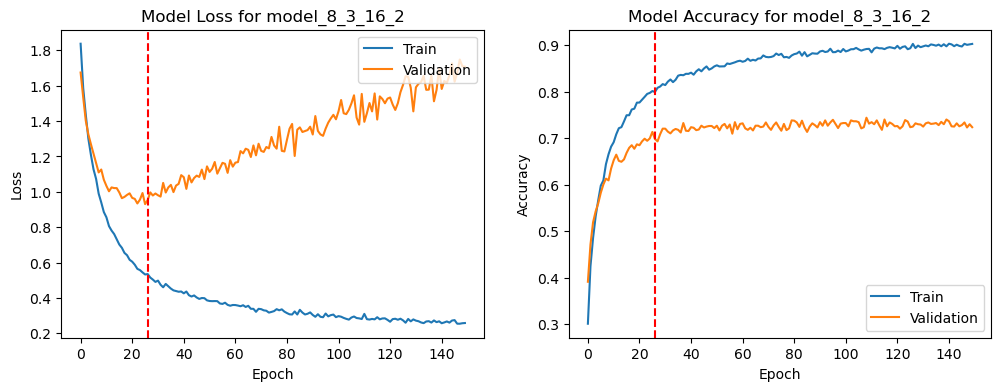

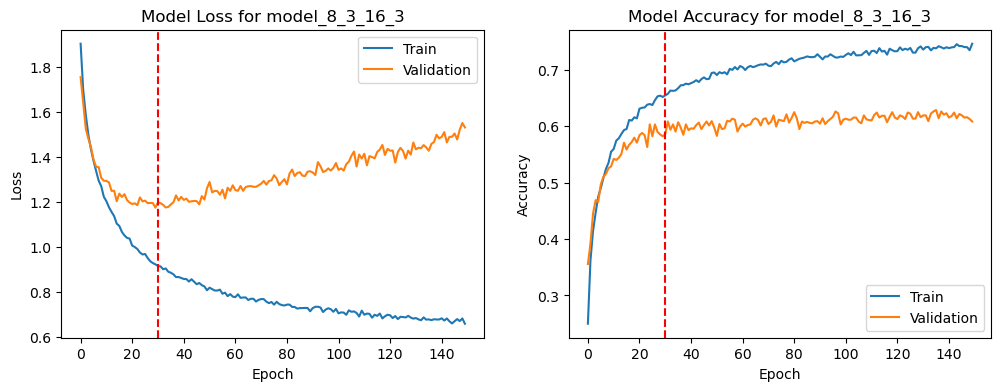

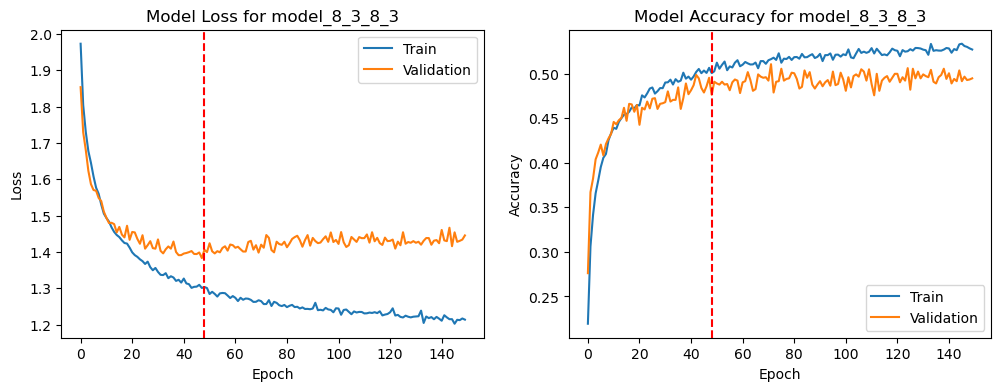

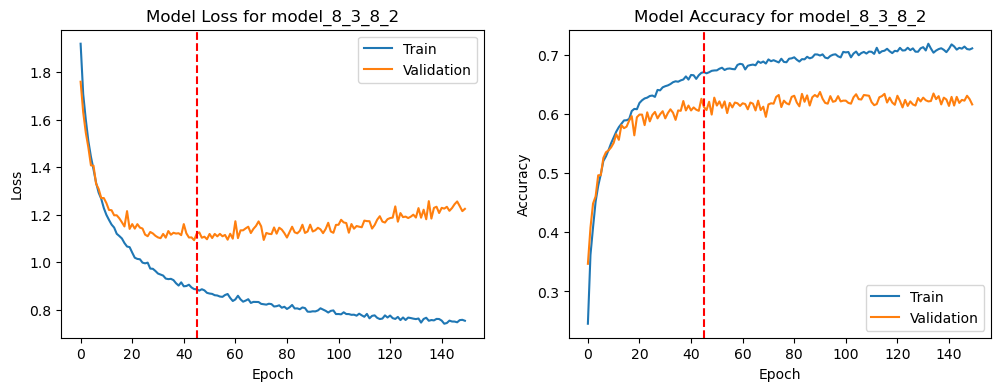

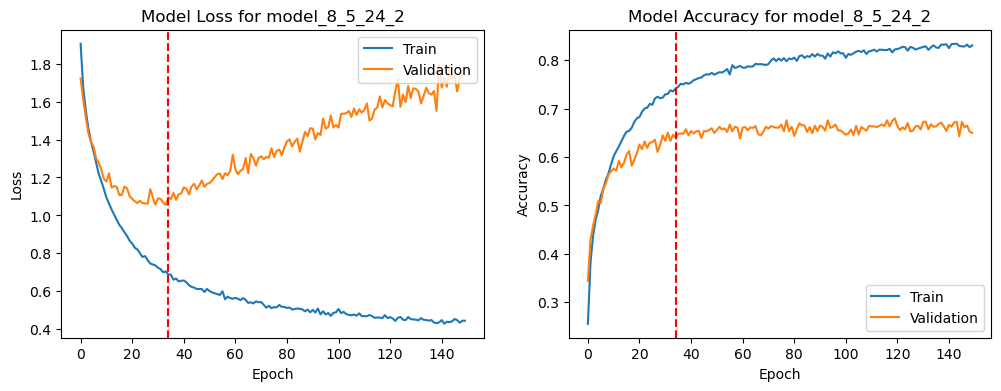

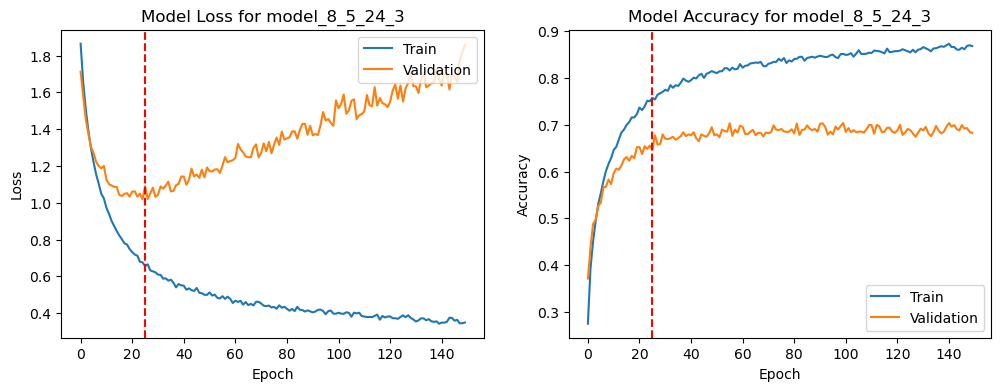

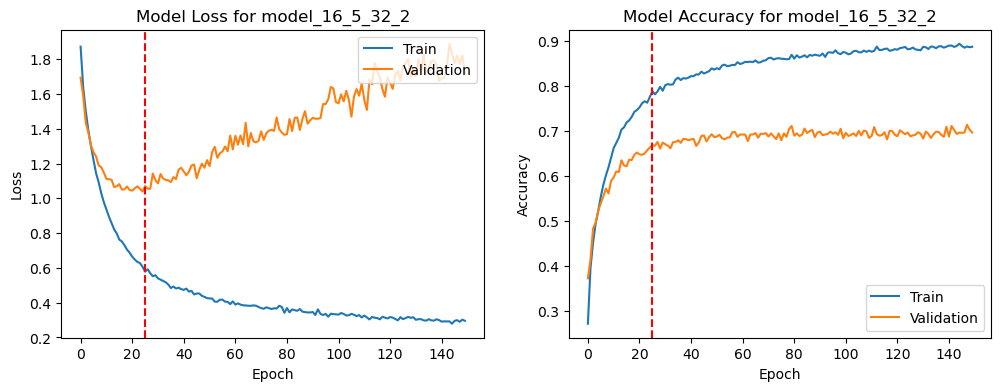

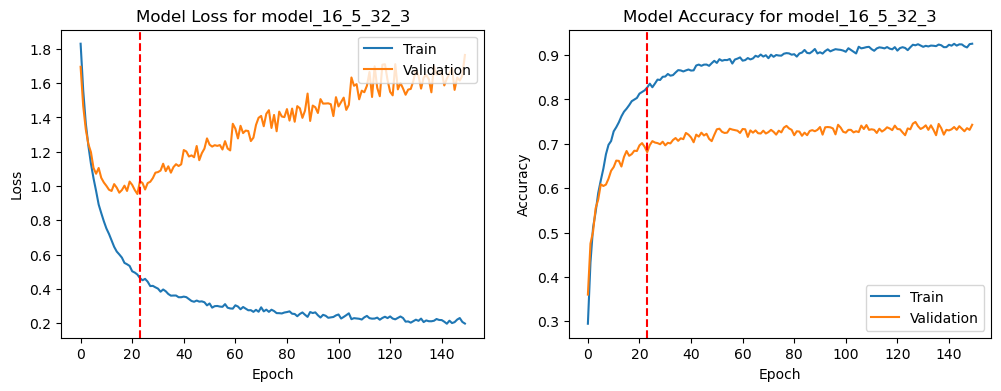

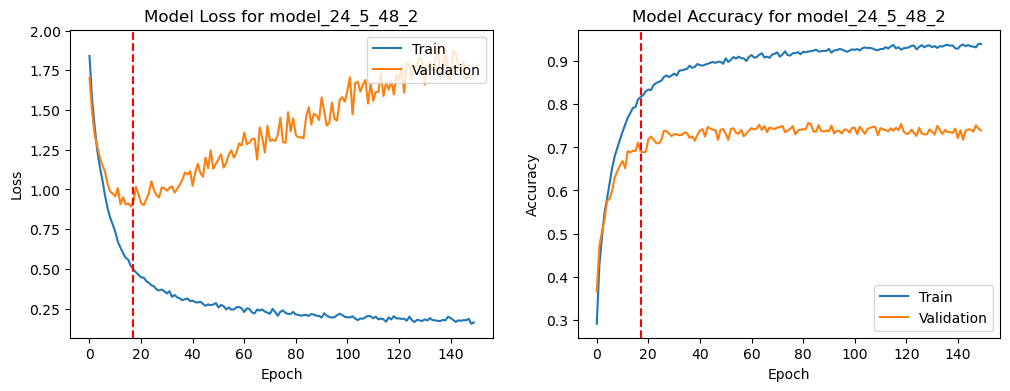

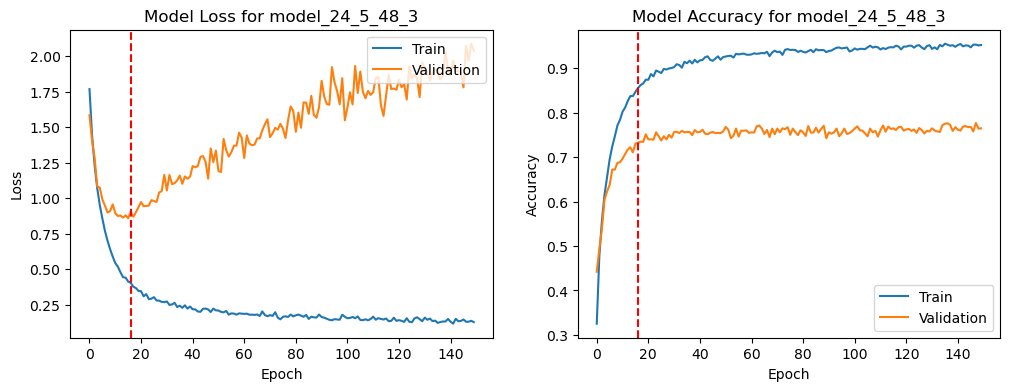

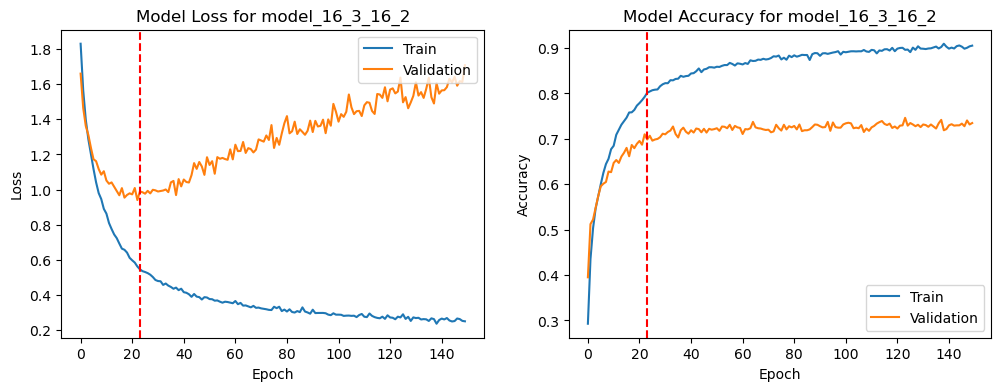

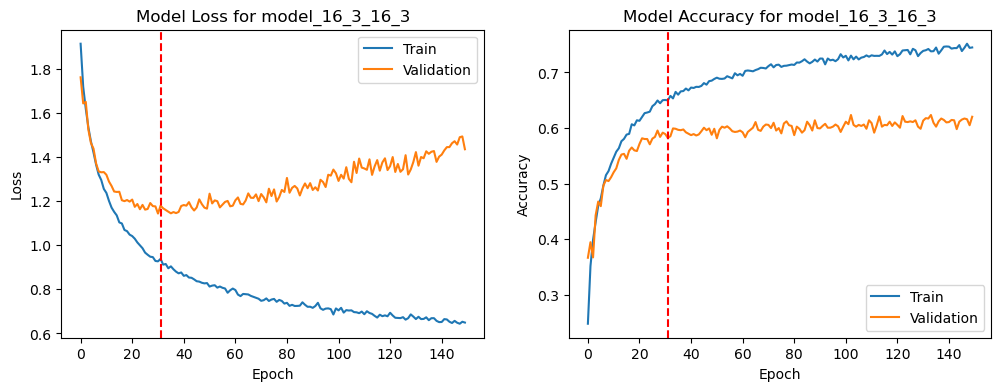

In [61]:
for key in model_dict.keys():
    plot_history(model_dict[key])

In [62]:
# layer dimensions
from tabulate import tabulate

for key in model_dict.keys():
    model = model_dict[key][0]
    print(f'Model Name: {key}')
    table = []
    for layer in model.layers:
        row = []
        row.append(layer.name)
        if len(layer.trainable_weights) > 0:
            row.append(np.prod(layer.trainable_weights[0].shape))
            row.append(np.prod(layer.trainable_weights[1].shape))
        else:
            row.append('-')
            row.append('-')
        row.append(layer.count_params())
        table.append(row)
    headers = ['Layer Name', 'Trainable Weights Shape', 'Trainable Bias Shape', 'Total Parameters']
    print(tabulate(table, headers=headers, tablefmt='orgtbl'))


Model Name: model_8_3_16_2
| Layer Name       | Trainable Weights Shape   | Trainable Bias Shape   |   Total Parameters |
|------------------+---------------------------+------------------------+--------------------|
| conv2d_32        | 72                        | 8                      |                 80 |
| max_pooling2d_32 | -                         | -                      |                  0 |
| conv2d_33        | 512                       | 16                     |                528 |
| max_pooling2d_33 | -                         | -                      |                  0 |
| flatten_16       | -                         | -                      |                  0 |
| dense_32         | 32768                     | 128                    |              32896 |
| dropout_16       | -                         | -                      |                  0 |
| dense_33         | 1024                      | 8                      |               1032 |
Model Name: model_8_3_1

In [63]:
from tabulate import tabulate

time_list = []

for key in model_dict.keys():
    #print(key)
    callback = model_dict[key][2]
    # Find the best epoch based on validation loss
    best_epoch = np.argmin(model_dict[key][1].history['val_loss']) + 1
    #print(callback.epoch_times[best_epoch])
    train_time = round(callback.epoch_times[best_epoch],2)  # get the training time
    time_list.append((key,best_epoch, train_time))

headers = ['Model Name','Epoch', 'Training Time']
print(tabulate(time_list, headers=headers, tablefmt='orgtbl'))


| Model Name      |   Epoch |   Training Time |
|-----------------+---------+-----------------|
| model_8_3_16_2  |      26 |            0.7  |
| model_8_3_16_3  |      30 |            0.75 |
| model_8_3_8_3   |      48 |            0.76 |
| model_8_3_8_2   |      45 |            0.72 |
| model_8_5_24_2  |      34 |            0.79 |
| model_8_5_24_3  |      25 |            0.93 |
| model_16_5_32_2 |      25 |            1.14 |
| model_16_5_32_3 |      23 |            1.58 |
| model_24_5_48_2 |      17 |            1.76 |
| model_24_5_48_3 |      16 |            1.77 |
| model_16_3_16_2 |      23 |            0.88 |
| model_16_3_16_3 |      31 |            0.97 |


In [64]:
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix

def summarize_performance(model_name,xtestset,ytestset):
    # Get the history object for the model
    #history = model_dict[model_name][1]

    # Find the best epoch based on validation loss
    best_epoch = np.argmin(model_name[1].history['val_loss']) + 1

    # Get the model and load the weights for the best epoch
    #model = model_dict[model_name][0]
    weights_path = f'C:/Final_Weights/{model_name[0].model_name}/epoch_{best_epoch}/model_weights.h5'
    model_name[0].load_weights(weights_path)

    # Evaluate the model on the test set
    y_true = np.argmax(ytestset, axis=1)
    y_pred = np.argmax(model_name[0].predict(xtestset), axis=1)
    test_acc = accuracy_score(y_true, y_pred)
    conf_matrix = confusion_matrix(y_true, y_pred, normalize='true')

    # Print the results
    print(f'Model: {model_name}')
    print(f'Test Accuracy (Best Epoch): {test_acc:.4f}')
    print(f'Confusion Matrix (Best Epoch):\n{conf_matrix}')

    # Save the confusion matrix as a CSV file
    conf_df = pd.DataFrame(100*conf_matrix)
    conf_df.to_csv(f'{model_name[0].model_name}.csv', index=True, header=True)




In [65]:
for key in model_dict.keys():
    summarize_performance(model_dict[key],xtestset=x_test,ytestset=y_test)


50/50 [==============================] - 0s 2ms/step
Model: (<__main__.MyModel object at 0x0000020C68102E00>, <keras.callbacks.History object at 0x0000020C51310E20>, <__main__.MyCallBack object at 0x0000020C5057CA00>)
Test Accuracy (Best Epoch): 0.7137
Confusion Matrix (Best Epoch):
[[0.87958115 0.         0.         0.04188482 0.02094241 0.02094241
  0.0104712  0.02617801]
 [0.00995025 0.66169154 0.12437811 0.09452736 0.04477612 0.04477612
  0.00497512 0.01492537]
 [0.02242152 0.07174888 0.67713004 0.05829596 0.06278027 0.07623318
  0.01345291 0.01793722]
 [0.03804348 0.02173913 0.02717391 0.73913043 0.03804348 0.06521739
  0.04347826 0.02717391]
 [0.01415094 0.05188679 0.08018868 0.04245283 0.6745283  0.05188679
  0.02830189 0.05660377]
 [0.04712042 0.03141361 0.03664921 0.09947644 0.02094241 0.65968586
  0.04712042 0.05759162]
 [0.02352941 0.01764706 0.02941176 0.11176471 0.01176471 0.05882353
  0.72352941 0.02352941]
 [0.075      0.02       0.035      0.045      0.06       0.025
  

50/50 [==============================] - 0s 4ms/step
Model: (<__main__.MyModel object at 0x0000020C03F9A5F0>, <keras.callbacks.History object at 0x0000020C7C5E0C40>, <__main__.MyCallBack object at 0x0000020C7C5E01C0>)
Test Accuracy (Best Epoch): 0.7112
Confusion Matrix (Best Epoch):
[[0.82722513 0.         0.02617801 0.02094241 0.0052356  0.05759162
  0.03141361 0.03141361]
 [0.00995025 0.75621891 0.06467662 0.04975124 0.02487562 0.07462687
  0.0199005  0.        ]
 [0.04035874 0.04932735 0.73542601 0.03139013 0.02690583 0.05381166
  0.03139013 0.03139013]
 [0.05978261 0.03804348 0.0326087  0.65217391 0.02173913 0.14130435
  0.04347826 0.01086957]
 [0.03301887 0.08962264 0.06603774 0.08962264 0.5990566  0.05188679
  0.03301887 0.03773585]
 [0.05235602 0.04712042 0.03664921 0.08376963 0.02617801 0.65968586
  0.05759162 0.03664921]
 [0.01764706 0.02941176 0.03529412 0.08823529 0.         0.06470588
  0.75882353 0.00588235]
 [0.085      0.03       0.04       0.02       0.025      0.04
  0

In [66]:
from tabulate import tabulate

table = []
for key in model_dict.keys():
    model = model_dict[key][0]
    history = model_dict[key][1]
    best_epoch = np.argmin(history.history['val_loss']) + 1
    test_loss, test_accuracy = model.evaluate(x_test, y_test)
    train_loss, train_accuracy = history.history['loss'][best_epoch-1], history.history['accuracy'][best_epoch-1]
    robust_ratio = test_accuracy/train_accuracy
    table.append([key, round(train_accuracy,2), round(test_accuracy,2), best_epoch, round(robust_ratio,2)])

headers = ['Model Name', 'Train Accuracy (Best Epoch)', 'Test Accuracy (Best Epoch)', 'Best Epoch', 'Robustness Ratios']
print(tabulate(table, headers=headers, tablefmt='orgtbl'))


50/50 [==============================] - 0s 2ms/step - loss: 1.1433 - accuracy: 0.5891
| Model Name      |   Train Accuracy (Best Epoch) |   Test Accuracy (Best Epoch) |   Best Epoch |   Robustness Ratios |
|-----------------+-------------------------------+------------------------------+--------------+---------------------|
| model_8_3_16_2  |                          0.8  |                         0.71 |           26 |                0.89 |
| model_8_3_16_3  |                          0.65 |                         0.58 |           30 |                0.89 |
| model_8_3_8_3   |                          0.51 |                         0.5  |           48 |                0.98 |
| model_8_3_8_2   |                          0.67 |                         0.63 |           45 |                0.93 |
| model_8_5_24_2  |                          0.74 |                         0.65 |           34 |                0.88 |
| model_8_5_24_3  |                          0.75 |                      

In [67]:
import math

def compute_err(acc1, acc2, N):
    ERR1 = math.sqrt(acc1*(1-acc1)/N)
    ERR2 = math.sqrt(acc2*(1-acc2)/N)
    err = math.sqrt(ERR1**2 + ERR2**2)
    return err


In [68]:
(0.77-0.74)/compute_err(0.77,0.74,1568)

1.9542812375949639

(14140, 432)
Number of components that explain 99% of the variance: 353


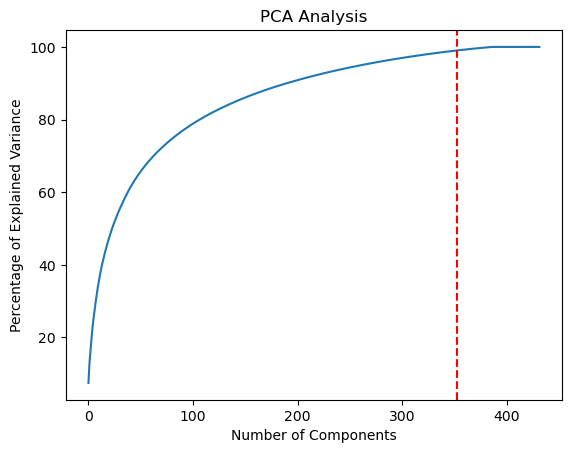

In [79]:
# pca analysis
model = model_dict['model_24_5_48_3'][0]

inputs = tf.keras.Input(shape=(20, 20, 1))

x = model.c1(inputs)
x = model.m1(x)
x = model.c2(x)
x = model.m2(x)
output = model.f1(x)

new_model = tf.keras.models.Model(inputs=inputs, outputs=output)

Z = new_model(x_trainval)
print(Z.shape)


# Perform PCA on the flattened output
pca = PCA()
pca.fit(Z)

# Find the number of components that explain 99% of the variance
variance_ratio_cumsum = np.cumsum(pca.explained_variance_ratio_)
num_components = np.argmax(variance_ratio_cumsum >= 0.99) + 1

print(f'Number of components that explain 99% of the variance: {num_components}')

# Perform PCA on the flattened output
pca = PCA()
pca.fit(Z)

# Find the number of components that explain 99% of the variance
variance_ratio_cumsum = np.cumsum(pca.explained_variance_ratio_)
num_components = np.argmax(variance_ratio_cumsum >= 0.99) + 1

# Generate plot of percentage of explained variance vs number of components
fig, ax = plt.subplots()
ax.plot(variance_ratio_cumsum * 100)
ax.axvline(num_components - 1, color='red', linestyle='--')
ax.set_xlabel('Number of Components')
ax.set_ylabel('Percentage of Explained Variance')
ax.set_title('PCA Analysis')
plt.show()

Best Performance Analysis

In [70]:
calculate_image_size(channels1=24, kernel_size1=5, channels2=48, kernel_size2=3, input_size=20)

((16, 16, 24), (8, 8, 24), (6, 6, 48), (3, 3, 48), 432, 216.0)

In [71]:
# 353 and 706
for hidden_layer in [num_components,2*num_components]:
    model_name = f'model_{c1}_{k1}_{c2}_{k2}_{int(hidden_layer)}' 
    model = model_builder(chan1=24,ker1=5,chan2=48,ker2=3,hidden=hidden_layer,
                          kernel_initializer='glorot_uniform',dropout=0.2,
                          lr=0.003,batch_size=100,epochs=150,
                          trainx=x_trainval,trainy=y_trainval,testx=x_test,testy=y_test,
                          model_name=model_name,outer_layer_size=8,fit=True)
    model_dict[model_name] = model

Epoch 1/150
142/142 [==============================] - 3s 13ms/step - loss: 1.8215 - accuracy: 0.3032 - val_loss: 1.6536 - val_accuracy: 0.3842
Epoch 2/150
142/142 [==============================] - 2s 12ms/step - loss: 1.4934 - accuracy: 0.4605 - val_loss: 1.4135 - val_accuracy: 0.4765
Epoch 3/150
142/142 [==============================] - 2s 12ms/step - loss: 1.2721 - accuracy: 0.5443 - val_loss: 1.2329 - val_accuracy: 0.5541
Epoch 4/150
142/142 [==============================] - 2s 11ms/step - loss: 1.1162 - accuracy: 0.5989 - val_loss: 1.1547 - val_accuracy: 0.5903
Epoch 5/150
142/142 [==============================] - 2s 11ms/step - loss: 0.9746 - accuracy: 0.6484 - val_loss: 1.1442 - val_accuracy: 0.6018
Epoch 6/150
142/142 [==============================] - 2s 11ms/step - loss: 0.8695 - accuracy: 0.6872 - val_loss: 1.0183 - val_accuracy: 0.6501
Epoch 7/150
142/142 [==============================] - 2s 11ms/step - loss: 0.7683 - accuracy: 0.7239 - val_loss: 0.9719 - val_accuracy:

142/142 [==============================] - 2s 11ms/step - loss: 0.1750 - accuracy: 0.9378 - val_loss: 1.3584 - val_accuracy: 0.7532
Epoch 58/150
142/142 [==============================] - 2s 12ms/step - loss: 0.1693 - accuracy: 0.9385 - val_loss: 1.4031 - val_accuracy: 0.7710
Epoch 59/150
142/142 [==============================] - 2s 12ms/step - loss: 0.1615 - accuracy: 0.9404 - val_loss: 1.4499 - val_accuracy: 0.7684
Epoch 60/150
142/142 [==============================] - 2s 12ms/step - loss: 0.1862 - accuracy: 0.9345 - val_loss: 1.4443 - val_accuracy: 0.7551
Epoch 61/150
142/142 [==============================] - 2s 11ms/step - loss: 0.1740 - accuracy: 0.9377 - val_loss: 1.4245 - val_accuracy: 0.7500
Epoch 62/150
142/142 [==============================] - 2s 11ms/step - loss: 0.1719 - accuracy: 0.9390 - val_loss: 1.3954 - val_accuracy: 0.7659
Epoch 63/150
142/142 [==============================] - 2s 11ms/step - loss: 0.1667 - accuracy: 0.9406 - val_loss: 1.3454 - val_accuracy: 0.763

142/142 [==============================] - 2s 13ms/step - loss: 0.1357 - accuracy: 0.9513 - val_loss: 1.7547 - val_accuracy: 0.7672
Epoch 114/150
142/142 [==============================] - 2s 13ms/step - loss: 0.1402 - accuracy: 0.9512 - val_loss: 1.7690 - val_accuracy: 0.7742
Epoch 115/150
142/142 [==============================] - 2s 13ms/step - loss: 0.1375 - accuracy: 0.9532 - val_loss: 1.9249 - val_accuracy: 0.7634
Epoch 116/150
142/142 [==============================] - 2s 13ms/step - loss: 0.1301 - accuracy: 0.9525 - val_loss: 1.8522 - val_accuracy: 0.7665
Epoch 117/150
142/142 [==============================] - 2s 12ms/step - loss: 0.1388 - accuracy: 0.9506 - val_loss: 1.8076 - val_accuracy: 0.7723
Epoch 118/150
142/142 [==============================] - 2s 12ms/step - loss: 0.1379 - accuracy: 0.9525 - val_loss: 1.8127 - val_accuracy: 0.7818
Epoch 119/150
142/142 [==============================] - 2s 12ms/step - loss: 0.1276 - accuracy: 0.9528 - val_loss: 1.7223 - val_accuracy:

142/142 [==============================] - 2s 16ms/step - loss: 0.5780 - accuracy: 0.7934 - val_loss: 0.8669 - val_accuracy: 0.6972
Epoch 9/150
142/142 [==============================] - 2s 15ms/step - loss: 0.5091 - accuracy: 0.8190 - val_loss: 0.8237 - val_accuracy: 0.7284
Epoch 10/150
142/142 [==============================] - 2s 15ms/step - loss: 0.4648 - accuracy: 0.8353 - val_loss: 0.8832 - val_accuracy: 0.7061
Epoch 11/150
142/142 [==============================] - 2s 15ms/step - loss: 0.4211 - accuracy: 0.8496 - val_loss: 0.8796 - val_accuracy: 0.7214
Epoch 12/150
142/142 [==============================] - 2s 14ms/step - loss: 0.3738 - accuracy: 0.8689 - val_loss: 0.8390 - val_accuracy: 0.7385
Epoch 13/150
142/142 [==============================] - 2s 15ms/step - loss: 0.3394 - accuracy: 0.8785 - val_loss: 0.9202 - val_accuracy: 0.7335
Epoch 14/150
142/142 [==============================] - 2s 16ms/step - loss: 0.3199 - accuracy: 0.8871 - val_loss: 0.8722 - val_accuracy: 0.7379

142/142 [==============================] - 2s 15ms/step - loss: 0.1250 - accuracy: 0.9528 - val_loss: 1.4976 - val_accuracy: 0.7767
Epoch 65/150
142/142 [==============================] - 2s 17ms/step - loss: 0.1157 - accuracy: 0.9558 - val_loss: 1.4618 - val_accuracy: 0.7704
Epoch 66/150
142/142 [==============================] - 2s 17ms/step - loss: 0.1236 - accuracy: 0.9547 - val_loss: 1.5867 - val_accuracy: 0.7754
Epoch 67/150
142/142 [==============================] - 2s 15ms/step - loss: 0.1359 - accuracy: 0.9493 - val_loss: 1.4478 - val_accuracy: 0.7799
Epoch 68/150
142/142 [==============================] - 2s 16ms/step - loss: 0.1271 - accuracy: 0.9535 - val_loss: 1.4921 - val_accuracy: 0.7691
Epoch 69/150
142/142 [==============================] - 2s 15ms/step - loss: 0.1265 - accuracy: 0.9555 - val_loss: 1.5869 - val_accuracy: 0.7595
Epoch 70/150
142/142 [==============================] - 2s 16ms/step - loss: 0.1262 - accuracy: 0.9533 - val_loss: 1.4745 - val_accuracy: 0.786

142/142 [==============================] - 2s 14ms/step - loss: 0.1251 - accuracy: 0.9589 - val_loss: 1.9281 - val_accuracy: 0.7742
Epoch 121/150
142/142 [==============================] - 2s 14ms/step - loss: 0.1097 - accuracy: 0.9615 - val_loss: 2.0281 - val_accuracy: 0.7799
Epoch 122/150
142/142 [==============================] - 2s 14ms/step - loss: 0.1105 - accuracy: 0.9601 - val_loss: 2.0024 - val_accuracy: 0.7716
Epoch 123/150
142/142 [==============================] - 2s 15ms/step - loss: 0.0968 - accuracy: 0.9653 - val_loss: 1.8126 - val_accuracy: 0.7837
Epoch 124/150
142/142 [==============================] - 2s 15ms/step - loss: 0.0862 - accuracy: 0.9678 - val_loss: 1.8820 - val_accuracy: 0.7844
Epoch 125/150
142/142 [==============================] - 2s 15ms/step - loss: 0.0957 - accuracy: 0.9660 - val_loss: 2.0683 - val_accuracy: 0.7754
Epoch 126/150
142/142 [==============================] - 2s 17ms/step - loss: 0.1010 - accuracy: 0.9647 - val_loss: 1.9032 - val_accuracy:

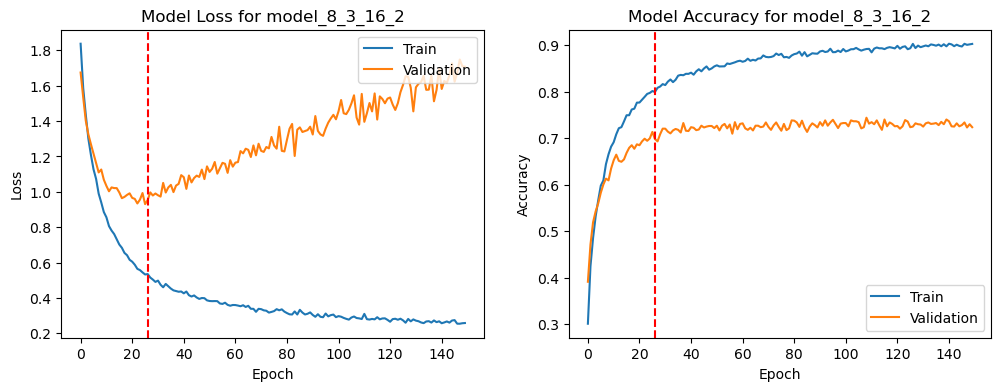

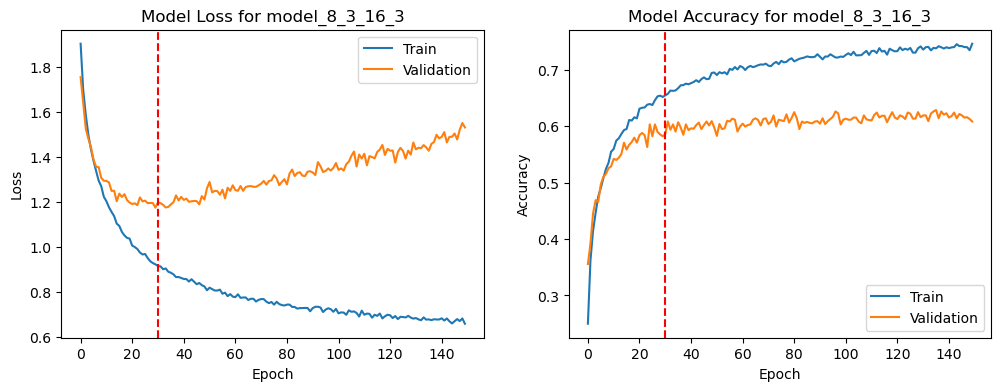

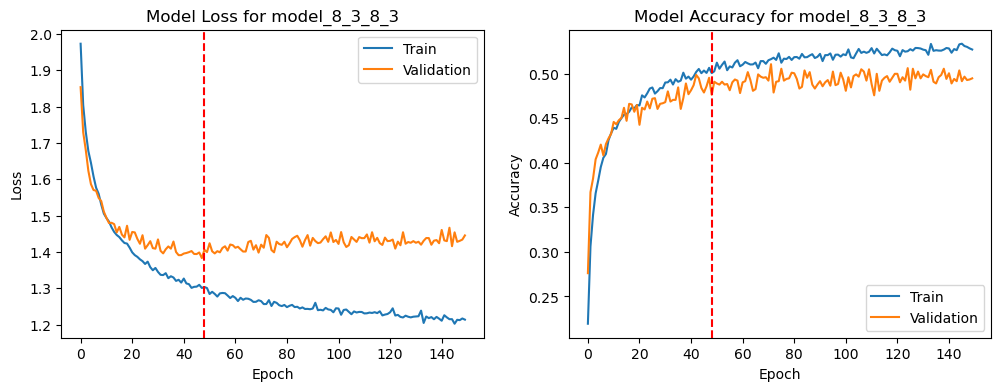

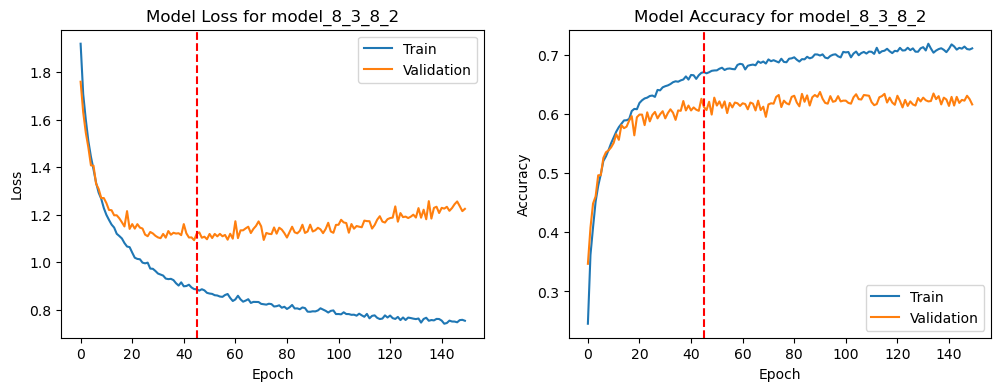

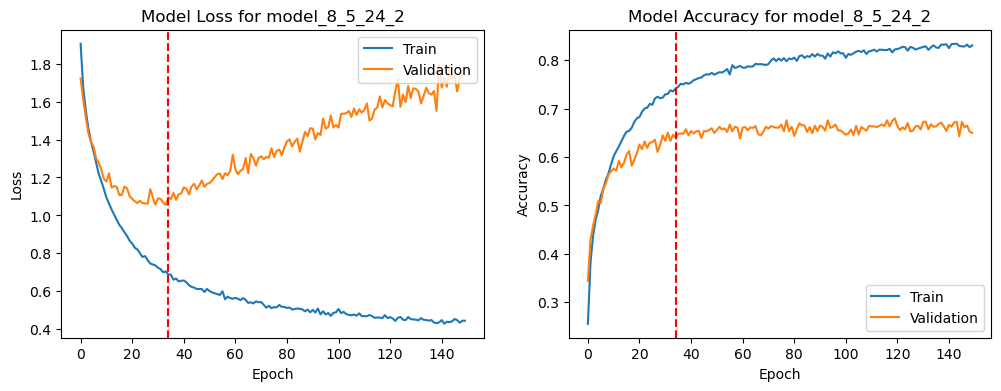

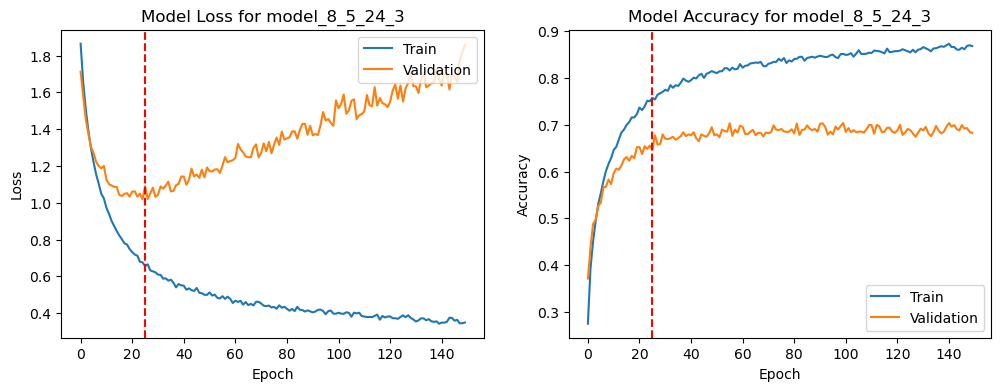

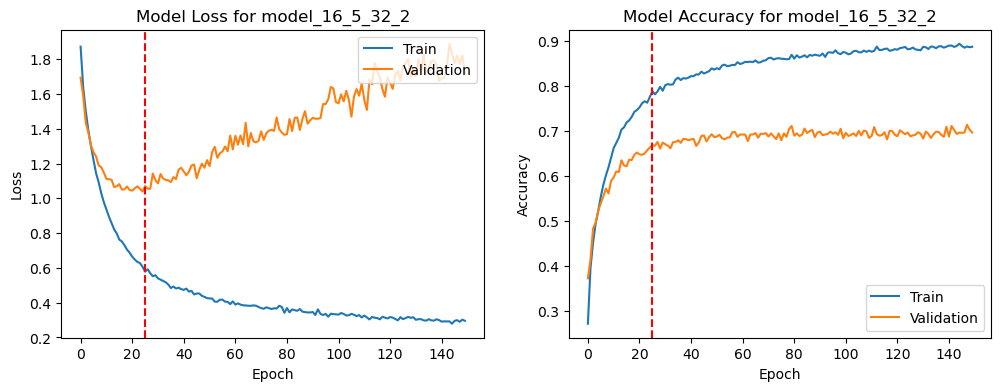

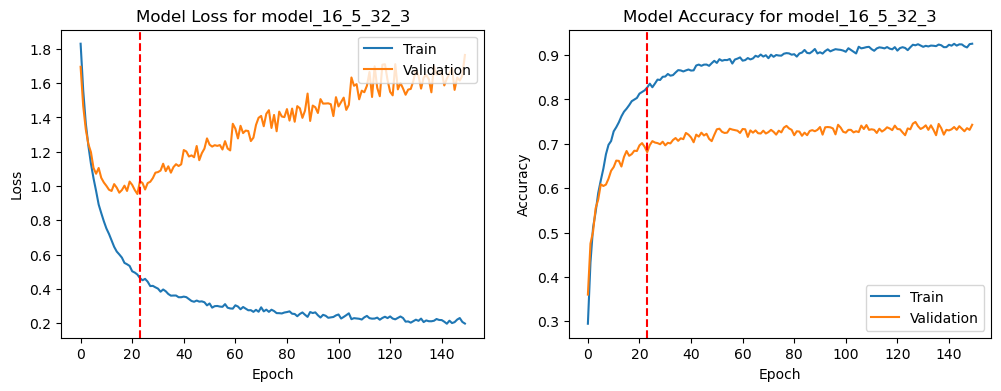

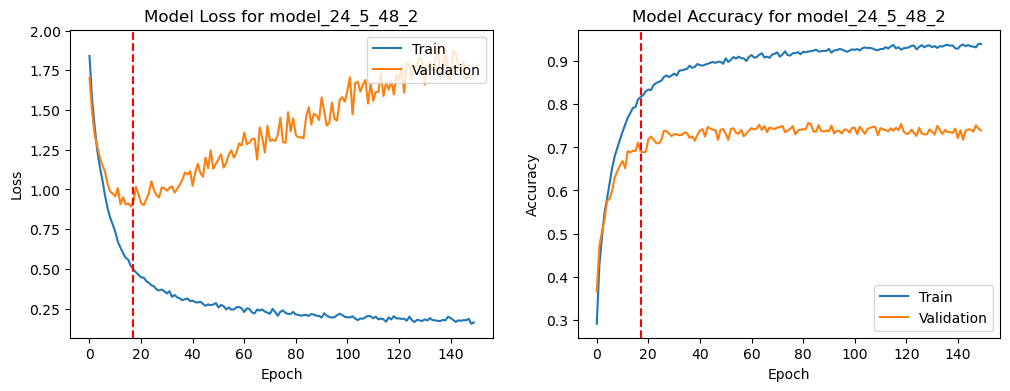

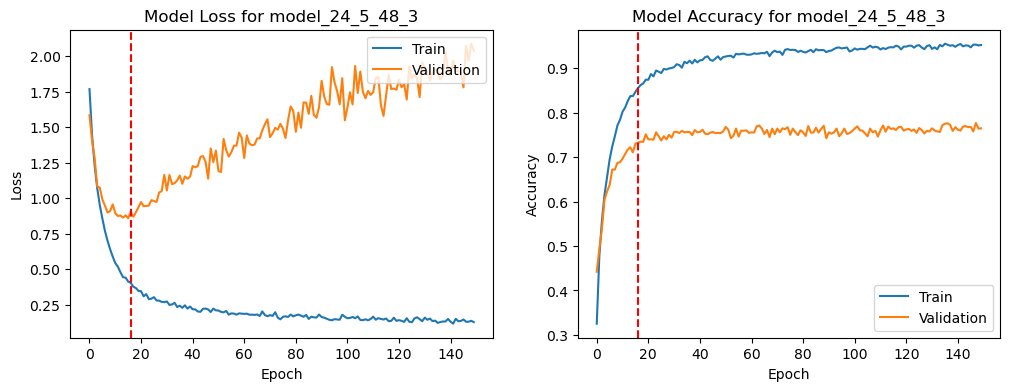

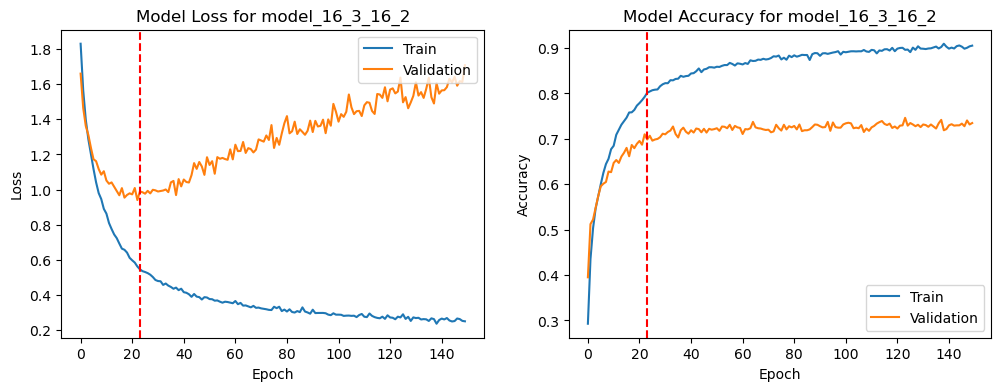

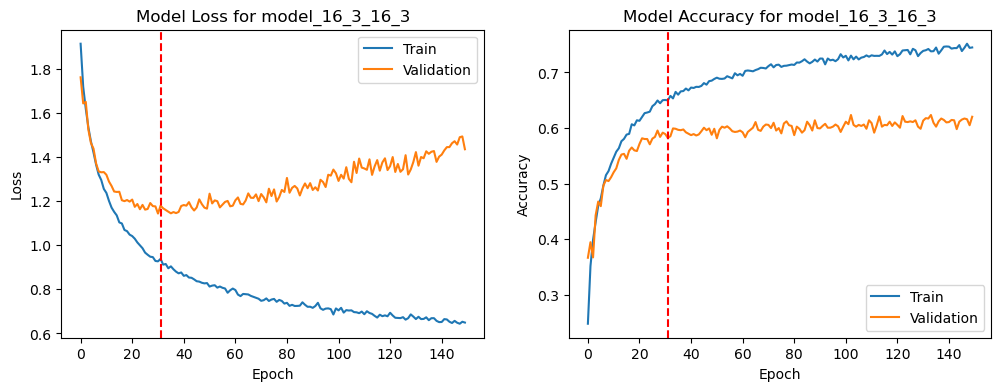

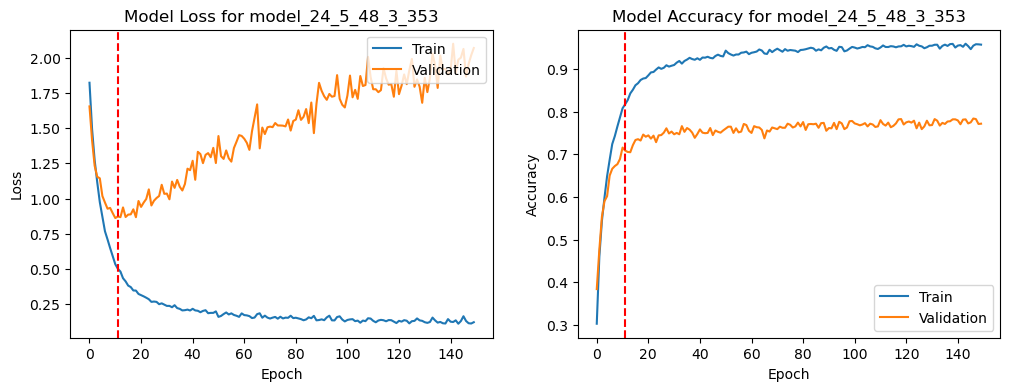

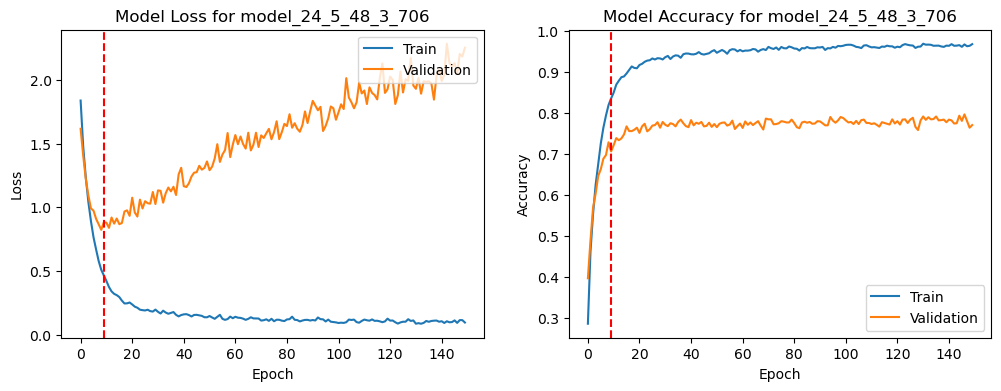

In [73]:
for key in model_dict.keys():
    plot_history(model_dict[key])

In [74]:
for key in model_dict.keys():
    model = model_dict[key][0]
    print(f'Model Name: {key}')
    table = []
    for layer in model.layers:
        row = []
        row.append(layer.name)
        if len(layer.trainable_weights) > 0:
            row.append(np.prod(layer.trainable_weights[0].shape))
            row.append(np.prod(layer.trainable_weights[1].shape))
        else:
            row.append('-')
            row.append('-')
        row.append(layer.count_params())
        table.append(row)
    headers = ['Layer Name', 'Trainable Weights Shape', 'Trainable Bias Shape', 'Total Parameters']
    print(tabulate(table, headers=headers, tablefmt='orgtbl'))

Model Name: model_8_3_16_2
| Layer Name       | Trainable Weights Shape   | Trainable Bias Shape   |   Total Parameters |
|------------------+---------------------------+------------------------+--------------------|
| conv2d_32        | 72                        | 8                      |                 80 |
| max_pooling2d_32 | -                         | -                      |                  0 |
| conv2d_33        | 512                       | 16                     |                528 |
| max_pooling2d_33 | -                         | -                      |                  0 |
| flatten_16       | -                         | -                      |                  0 |
| dense_32         | 32768                     | 128                    |              32896 |
| dropout_16       | -                         | -                      |                  0 |
| dense_33         | 1024                      | 8                      |               1032 |
Model Name: model_8_3_1

In [75]:
for key in model_dict.keys():
    summarize_performance(model_dict[key],xtestset=x_test,ytestset=y_test)


50/50 [==============================] - 0s 2ms/step
Model: (<__main__.MyModel object at 0x0000020C68102E00>, <keras.callbacks.History object at 0x0000020C51310E20>, <__main__.MyCallBack object at 0x0000020C5057CA00>)
Test Accuracy (Best Epoch): 0.7137
Confusion Matrix (Best Epoch):
[[0.87958115 0.         0.         0.04188482 0.02094241 0.02094241
  0.0104712  0.02617801]
 [0.00995025 0.66169154 0.12437811 0.09452736 0.04477612 0.04477612
  0.00497512 0.01492537]
 [0.02242152 0.07174888 0.67713004 0.05829596 0.06278027 0.07623318
  0.01345291 0.01793722]
 [0.03804348 0.02173913 0.02717391 0.73913043 0.03804348 0.06521739
  0.04347826 0.02717391]
 [0.01415094 0.05188679 0.08018868 0.04245283 0.6745283  0.05188679
  0.02830189 0.05660377]
 [0.04712042 0.03141361 0.03664921 0.09947644 0.02094241 0.65968586
  0.04712042 0.05759162]
 [0.02352941 0.01764706 0.02941176 0.11176471 0.01176471 0.05882353
  0.72352941 0.02352941]
 [0.075      0.02       0.035      0.045      0.06       0.025
  

50/50 [==============================] - 0s 3ms/step
Model: (<__main__.MyModel object at 0x0000020C03F9A5F0>, <keras.callbacks.History object at 0x0000020C7C5E0C40>, <__main__.MyCallBack object at 0x0000020C7C5E01C0>)
Test Accuracy (Best Epoch): 0.7112
Confusion Matrix (Best Epoch):
[[0.82722513 0.         0.02617801 0.02094241 0.0052356  0.05759162
  0.03141361 0.03141361]
 [0.00995025 0.75621891 0.06467662 0.04975124 0.02487562 0.07462687
  0.0199005  0.        ]
 [0.04035874 0.04932735 0.73542601 0.03139013 0.02690583 0.05381166
  0.03139013 0.03139013]
 [0.05978261 0.03804348 0.0326087  0.65217391 0.02173913 0.14130435
  0.04347826 0.01086957]
 [0.03301887 0.08962264 0.06603774 0.08962264 0.5990566  0.05188679
  0.03301887 0.03773585]
 [0.05235602 0.04712042 0.03664921 0.08376963 0.02617801 0.65968586
  0.05759162 0.03664921]
 [0.01764706 0.02941176 0.03529412 0.08823529 0.         0.06470588
  0.75882353 0.00588235]
 [0.085      0.03       0.04       0.02       0.025      0.04
  0

In [76]:
from tabulate import tabulate

time_list = []

for key in model_dict.keys():
    #print(key)
    callback = model_dict[key][2]
    # Find the best epoch based on validation loss
    best_epoch = np.argmin(model_dict[key][1].history['val_loss']) + 1
    #print(callback.epoch_times[best_epoch])
    train_time = round(callback.epoch_times[best_epoch],2)  # get the training time
    time_list.append((key,best_epoch, train_time))

headers = ['Model Name','Epoch', 'Training Time']
print(tabulate(time_list, headers=headers, tablefmt='orgtbl'))

| Model Name          |   Epoch |   Training Time |
|---------------------+---------+-----------------|
| model_8_3_16_2      |      26 |            0.7  |
| model_8_3_16_3      |      30 |            0.75 |
| model_8_3_8_3       |      48 |            0.76 |
| model_8_3_8_2       |      45 |            0.72 |
| model_8_5_24_2      |      34 |            0.79 |
| model_8_5_24_3      |      25 |            0.93 |
| model_16_5_32_2     |      25 |            1.14 |
| model_16_5_32_3     |      23 |            1.58 |
| model_24_5_48_2     |      17 |            1.76 |
| model_24_5_48_3     |      16 |            1.77 |
| model_16_3_16_2     |      23 |            0.88 |
| model_16_3_16_3     |      31 |            0.97 |
| model_24_5_48_3_353 |      11 |            1.62 |
| model_24_5_48_3_706 |       9 |            2.1  |


In [77]:
from tabulate import tabulate

table = []
for key in model_dict.keys():
    model = model_dict[key][0]
    history = model_dict[key][1]
    best_epoch = np.argmin(history.history['val_loss']) + 1
    test_loss, test_accuracy = model.evaluate(x_test, y_test)
    train_loss, train_accuracy = history.history['loss'][best_epoch-1], history.history['accuracy'][best_epoch-1]
    robust_ratio = test_accuracy/train_accuracy
    table.append([key, round(train_accuracy,2), round(test_accuracy,2), best_epoch, round(robust_ratio,2)])

headers = ['Model Name', 'Train Accuracy (Best Epoch)', 'Test Accuracy (Best Epoch)', 'Best Epoch', 'Robustness Ratios']
print(tabulate(table, headers=headers, tablefmt='orgtbl'))

50/50 [==============================] - 0s 2ms/step - loss: 0.8237 - accuracy: 0.7284
| Model Name          |   Train Accuracy (Best Epoch) |   Test Accuracy (Best Epoch) |   Best Epoch |   Robustness Ratios |
|---------------------+-------------------------------+------------------------------+--------------+---------------------|
| model_8_3_16_2      |                          0.8  |                         0.71 |           26 |                0.89 |
| model_8_3_16_3      |                          0.65 |                         0.58 |           30 |                0.89 |
| model_8_3_8_3       |                          0.51 |                         0.5  |           48 |                0.98 |
| model_8_3_8_2       |                          0.67 |                         0.63 |           45 |                0.93 |
| model_8_5_24_2      |                          0.74 |                         0.65 |           34 |                0.88 |
| model_8_5_24_3      |                      

Two Class Analysis

In [80]:
# save the confusion matrix for the best class
model = model_dict['model_24_5_48_3_706'][0]

inputs = tf.keras.Input(shape=(20, 20, 1))

x = model.c1(inputs)
x = model.m1(x)
x = model.c2(x)
x = model.m2(x)
x = model.f1(x)
x = model.h1(x)
x = model.d1(x)
output = model.o(x)

new_model = tf.keras.models.Model(inputs=inputs, outputs=output)

resulttrain = new_model(x_trainval)
resulttest = new_model(x_test)

from sklearn.metrics import confusion_matrix
import pandas as pd

# Get the predicted classes for trainval and test sets
y_trainval_pred = np.argmax(resulttrain, axis=1)
y_test_pred = np.argmax(resulttest, axis=1)

# Calculate the confusion matrices
test_cm = confusion_matrix(np.argmax(y_test, axis=1), y_test_pred)

# Convert the confusion matrix to percentages
test_cm_percent = (test_cm / test_cm.sum(axis=1)[:, np.newaxis]) * 100

# Save the confusion matrices as csv files
pd.DataFrame(test_cm_percent).to_csv('test_cm_percent.csv', index=False)



In [81]:
y_new = dfy[['CASTELLAR','GLOUCESTER']].loc[~((dfy['CASTELLAR']==0)&(dfy['GLOUCESTER']==0))]

x_new = x_input[y_new.index]

In [82]:
from sklearn.model_selection import train_test_split

x_newtrainval, x_newtest, y_newtrainval, y_newtest = train_test_split(x_new, y_new, test_size=.1, random_state=3)

x_newtrainval.shape, x_newtest.shape, y_newtrainval.shape, y_newtest.shape

((3621, 20, 20, 1), (403, 20, 20, 1), (3621, 2), (403, 2))

In [83]:
two_class_model = model_builder(chan1=24,ker1=5,chan2=48,ker2=3,hidden=706,kernel_initializer='glorot_uniform',dropout=0.2,lr=0.003,batch_size=100,epochs=150, trainx=x_newtrainval,trainy=y_newtrainval,testx=x_newtest,testy=y_newtest,model_name='two_class_model',outer_layer_size=2,fit=True)


Epoch 1/150
37/37 [==============================] - 2s 19ms/step - loss: 0.6191 - accuracy: 0.6625 - val_loss: 0.4591 - val_accuracy: 0.7866
Epoch 2/150
37/37 [==============================] - 0s 13ms/step - loss: 0.4594 - accuracy: 0.7948 - val_loss: 0.5049 - val_accuracy: 0.7469
Epoch 3/150
37/37 [==============================] - 0s 13ms/step - loss: 0.4277 - accuracy: 0.8139 - val_loss: 0.3620 - val_accuracy: 0.8462
Epoch 4/150
37/37 [==============================] - 1s 14ms/step - loss: 0.3953 - accuracy: 0.8224 - val_loss: 0.3594 - val_accuracy: 0.8337
Epoch 5/150
37/37 [==============================] - 1s 14ms/step - loss: 0.3772 - accuracy: 0.8382 - val_loss: 0.3352 - val_accuracy: 0.8536
Epoch 6/150
37/37 [==============================] - 0s 13ms/step - loss: 0.3180 - accuracy: 0.8644 - val_loss: 0.3342 - val_accuracy: 0.8685
Epoch 7/150
37/37 [==============================] - 0s 13ms/step - loss: 0.2956 - accuracy: 0.8691 - val_loss: 0.3331 - val_accuracy: 0.8437
Epoch 

37/37 [==============================] - 1s 14ms/step - loss: 0.0175 - accuracy: 0.9914 - val_loss: 0.6086 - val_accuracy: 0.8809
Epoch 59/150
37/37 [==============================] - 0s 13ms/step - loss: 0.0161 - accuracy: 0.9934 - val_loss: 0.5548 - val_accuracy: 0.8983
Epoch 60/150
37/37 [==============================] - 0s 13ms/step - loss: 0.0154 - accuracy: 0.9934 - val_loss: 0.6166 - val_accuracy: 0.8834
Epoch 61/150
37/37 [==============================] - 0s 13ms/step - loss: 0.0153 - accuracy: 0.9939 - val_loss: 0.6247 - val_accuracy: 0.8908
Epoch 62/150
37/37 [==============================] - 0s 12ms/step - loss: 0.0226 - accuracy: 0.9903 - val_loss: 0.6551 - val_accuracy: 0.8908
Epoch 63/150
37/37 [==============================] - 0s 12ms/step - loss: 0.0173 - accuracy: 0.9928 - val_loss: 0.6476 - val_accuracy: 0.8908
Epoch 64/150
37/37 [==============================] - 0s 12ms/step - loss: 0.0210 - accuracy: 0.9912 - val_loss: 0.6564 - val_accuracy: 0.8759
Epoch 65/150

37/37 [==============================] - 0s 13ms/step - loss: 0.0082 - accuracy: 0.9961 - val_loss: 0.7193 - val_accuracy: 0.9057
Epoch 116/150
37/37 [==============================] - 0s 13ms/step - loss: 0.0083 - accuracy: 0.9964 - val_loss: 0.7567 - val_accuracy: 0.9057
Epoch 117/150
37/37 [==============================] - 0s 12ms/step - loss: 0.0077 - accuracy: 0.9964 - val_loss: 0.7177 - val_accuracy: 0.9082
Epoch 118/150
37/37 [==============================] - 0s 12ms/step - loss: 0.0183 - accuracy: 0.9939 - val_loss: 0.7750 - val_accuracy: 0.8809
Epoch 119/150
37/37 [==============================] - 0s 13ms/step - loss: 0.0739 - accuracy: 0.9762 - val_loss: 0.6016 - val_accuracy: 0.8784
Epoch 120/150
37/37 [==============================] - 0s 13ms/step - loss: 0.0656 - accuracy: 0.9757 - val_loss: 0.6611 - val_accuracy: 0.8685
Epoch 121/150
37/37 [==============================] - 0s 12ms/step - loss: 0.0314 - accuracy: 0.9876 - val_loss: 0.6046 - val_accuracy: 0.9007
Epoch 

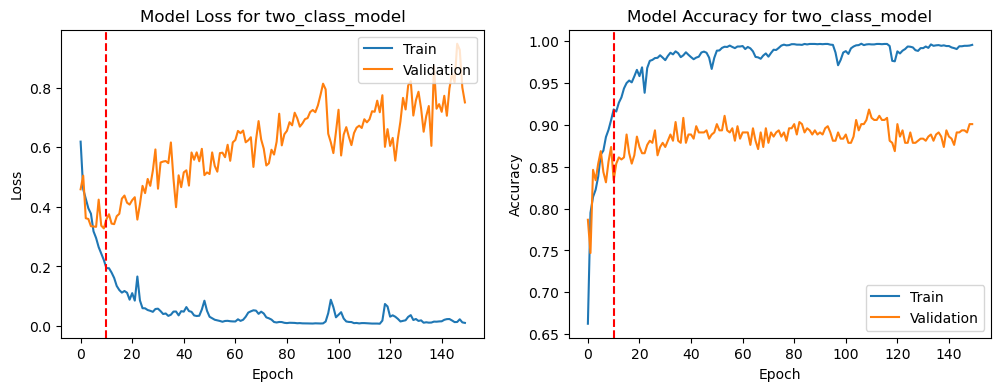

In [84]:
plot_history(two_class_model)

In [85]:
summarize_performance(two_class_model,xtestset=np.array(x_newtest),ytestset=np.array(y_newtest))

13/13 [==============================] - 0s 2ms/step
Model: (<__main__.MyModel object at 0x0000020C720E1210>, <keras.callbacks.History object at 0x0000020C67CCE830>, <__main__.MyCallBack object at 0x0000020C67C9C820>)
Test Accuracy (Best Epoch): 0.8734
Confusion Matrix (Best Epoch):
[[0.80733945 0.19266055]
 [0.04864865 0.95135135]]


AUC ROC curve

13/13 [==============================] - 0s 2ms/step


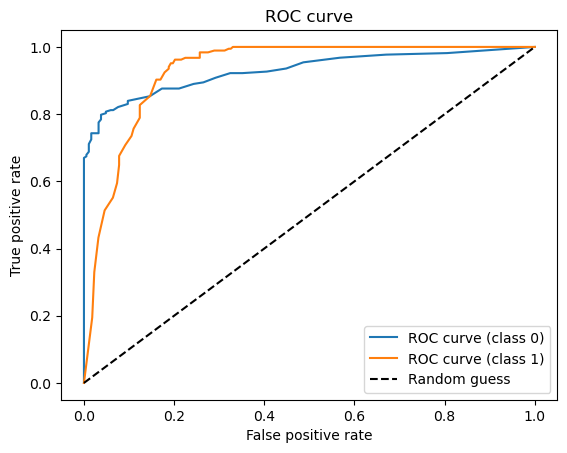

Area under the ROC curve (class 0): 0.931
Area under the ROC curve (class 1): 0.931


In [86]:
from sklearn.metrics import auc, roc_curve

# define threshold values
a_values = np.linspace(0, 1, 51)
a_values = np.around(a_values, decimals=2)
a_values[-1] = 1.0 
tp = {'class_0': [], 'class_1': []}
fp = {'class_0': [], 'class_1': []}
for a in a_values:
    y_pred = two_class_model[0].predict(x_newtest)
    y_pred_class_0 = (y_pred[:,0] > a).astype(int) # predicted class labels for class 0
    y_pred_class_1 = (y_pred[:,1] > a).astype(int) # predicted class labels for class 1
    tn_0, fp_val_0, fn_0, tp_val_0 = confusion_matrix(y_newtest.iloc[:,0], y_pred_class_0).ravel()
    tn_1, fp_val_1, fn_1, tp_val_1 = confusion_matrix(y_newtest.iloc[:,1], y_pred_class_1).ravel()
    tp_rate_0 = tp_val_0 / (tp_val_0 + fn_0)
    fp_rate_0 = fp_val_0 / (fp_val_0 + tn_0)
    tp_rate_1 = tp_val_1 / (tp_val_1 + fn_1)
    fp_rate_1 = fp_val_1 / (fp_val_1 + tn_1)
    tp['class_0'].append(tp_rate_0)
    fp['class_0'].append(fp_rate_0)
    tp['class_1'].append(tp_rate_1)
    fp['class_1'].append(fp_rate_1)

# plot
plt.plot(fp['class_0'], tp['class_0'], label='ROC curve (class 0)')
plt.plot(fp['class_1'], tp['class_1'], label='ROC curve (class 1)')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.show()

# AUCs
fpr_0, tpr_0, thresholds_0 = roc_curve(y_newtest.iloc[:,0], y_pred[:,0])
auc_val_0 = auc(fpr_0, tpr_0)
print('Area under the ROC curve (class 0): {:.3f}'.format(auc_val_0))

fpr_1, tpr_1, thresholds_1 = roc_curve(y_newtest.iloc[:,1], y_pred[:,1])
auc_val_1 = auc(fpr_1, tpr_1)
print('Area under the ROC curve (class 1): {:.3f}'.format(auc_val_1))